# House Prices Competition : Term Project 

#### Description:

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

#### To do List :

* Functions for each data preparation and processing method
* Read about features engineering and selection
* apply pca
* how to select the non_numerical features that are most important 


### Importing Libraries:

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.base import TransformerMixin
import sklearn.preprocessing as pp
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso


import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [19]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [20]:
train.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [21]:
print ("Train data shape:", train.shape)

Train data shape: (1460, 81)


In [22]:
print ("Train data shape:", test.shape)

Train data shape: (1459, 80)


How many columns with different datatypes are there?

In [23]:
train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [24]:
test.get_dtype_counts()

float64    11
int64      26
object     43
dtype: int64

We explore the target variable :

In [25]:
train.SalePrice.describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Save id and drop it (we do not need it as a feature)

In [26]:
train_ID = train['Id']

train.drop("Id", axis = 1, inplace = True)
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside    ...            0    NaN   NaN   
1         Lvl    AllPub       FR2    ...            0    NaN   NaN   
2         Lvl    AllPub    Inside    ...            0    NaN   NaN   
3         Lvl    AllPub    Corner    ...            0    NaN   NaN   
4         Lvl    AllPub       FR2    ...            0    NaN   NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0         NaN       0      2    2008        WD         Normal     208500  
1         NaN       0      5    2007        WD         Normal     181500  
2         NaN       0      9    2008        WD         Normal     223500  
3         NaN       0      2    2006        WD        Abnorml     140000  
4         NaN       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [27]:
test_ID = test['Id']

test.drop("Id", axis = 1, inplace = True)
test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RH         80.0    11622   Pave   NaN      Reg   
1          20       RL         81.0    14267   Pave   NaN      IR1   
2          60       RL         74.0    13830   Pave   NaN      IR1   
3          60       RL         78.0     9978   Pave   NaN      IR1   
4         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig      ...       ScreenPorch PoolArea PoolQC  \
0         Lvl    AllPub    Inside      ...               120        0    NaN   
1         Lvl    AllPub    Corner      ...                 0        0    NaN   
2         Lvl    AllPub    Inside      ...                 0        0    NaN   
3         Lvl    AllPub    Inside      ...                 0        0    NaN   
4         HLS    AllPub    Inside      ...               144        0    NaN   

   Fence MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0  MnPrv         NaN       0       6    2010        WD         Normal  
1    NaN        Gar2   12500       6    2010        WD         Normal  
2  MnPrv         NaN       0       3    2010        WD         Normal  
3    NaN         NaN       0       6    2010        WD         Normal  
4    NaN         NaN       0       1    2010        WD         Normal  

[5 rows x 79 columns]

Describe gives statistical information about numerical columns in the dataset

In [28]:
train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 37 columns]

Print distribution of sales prices graph

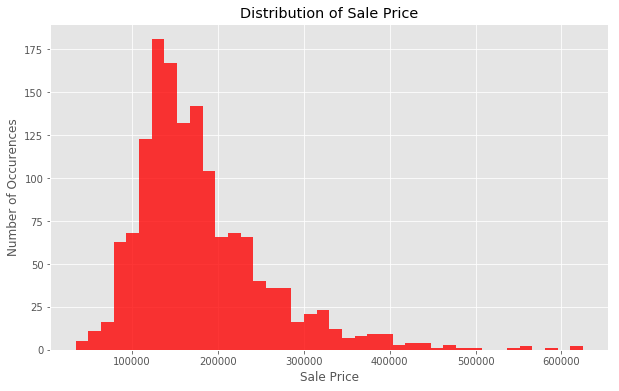

In [45]:
sns.distplot(train['SalePrice'], color="r", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")
plt.show()

#### Correlations between numerical values and target value :

we will try to see the relationship between numerical values

Correlation matrix. This shows multicollinearity. In regression, "multicollinearity" refers to features that are correlated with other features. Multicollinearity occurs when your model includes multiple factors that are correlated not just to your target variable, but also to each other. Problem: Multicollinearity increases the standard errors of the coefficients. That means, multicollinearity makes some variables statistically insignificant when they should be significant. To avoid this we can do 3 things: Completely remove those variables Make new feature by adding them or by some other operation. Use PCA, which will reduce feature set to small number of non-collinear features. Only numerical values

In [29]:
# getting only numerical values
numeric_features = train.select_dtypes(include=[np.number])

In [30]:
# Compute the correlation matrix
corr = numeric_features.corr()

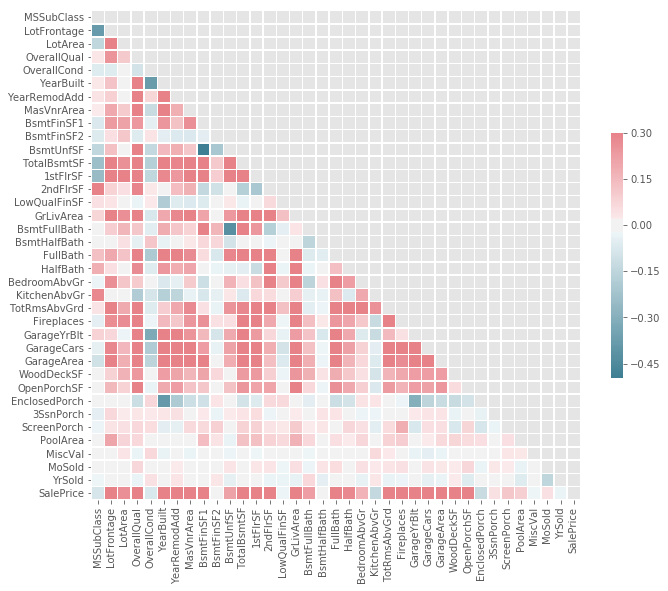

In [31]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Correlaton between two features

In [47]:
correlations = train.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

Attribute Pair  Correlation
11      (GarageArea, GarageCars)     0.889517
24     (GrLivArea, TotRmsAbvGrd)     0.834233
2       (GarageYrBlt, YearBuilt)     0.826061
15       (1stFlrSF, TotalBsmtSF)     0.799173
25         (2ndFlrSF, GrLivArea)     0.689681
5   (BedroomAbvGr, TotRmsAbvGrd)     0.680007
17    (BsmtFinSF1, BsmtFullBath)     0.661116
14   (GarageYrBlt, YearRemodAdd)     0.642344
22         (FullBath, GrLivArea)     0.634855
7       (2ndFlrSF, TotRmsAbvGrd)     0.612242
18          (2ndFlrSF, HalfBath)     0.609661
0      (GarageCars, OverallQual)     0.606853
1      (YearBuilt, YearRemodAdd)     0.590570
3      (GarageCars, GarageYrBlt)     0.590002
16      (GrLivArea, OverallQual)     0.582870
10     (GarageArea, GarageYrBlt)     0.572738
6       (OverallQual, YearBuilt)     0.570313
9      (GarageArea, OverallQual)     0.569541
12      (FullBath, TotRmsAbvGrd)     0.549798
19    (GarageYrBlt, OverallQual)     0.548954
4    (OverallQual, YearRemodAdd)     0.548916
21       (FullBath, OverallQual)     0.542692
27     (BedroomAbvGr, GrLivArea)     0.541072
13       (GarageCars, YearBuilt)     0.540097
26    (OverallQual, TotalBsmtSF)     0.530837
8        (BsmtFinSF1, BsmtUnfSF)    -0.526137
23         (1stFlrSF, GrLivArea)     0.521605
20      (2ndFlrSF, BedroomAbvGr)     0.502306

Now we will get 5 most correlated features with sale price and the least 5 correlated features with the target value too

In [32]:
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])


SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Features with missing values 

In [48]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

Null Count
Feature                 
PoolQC              1447
MiscFeature         1399
Alley               1361
Fence               1172
FireplaceQu          689
LotFrontage          258
GarageType            81
GarageCond            81
GarageFinish          81
GarageQual            81
GarageYrBlt           81
BsmtFinType2          38
BsmtExposure          38
BsmtQual              37
BsmtCond              37
BsmtFinType1          37
MasVnrArea             8
MasVnrType             8
Electrical             1
RoofMatl               0
Exterior1st            0
RoofStyle              0
ExterQual              0
Exterior2nd            0
YearBuilt              0

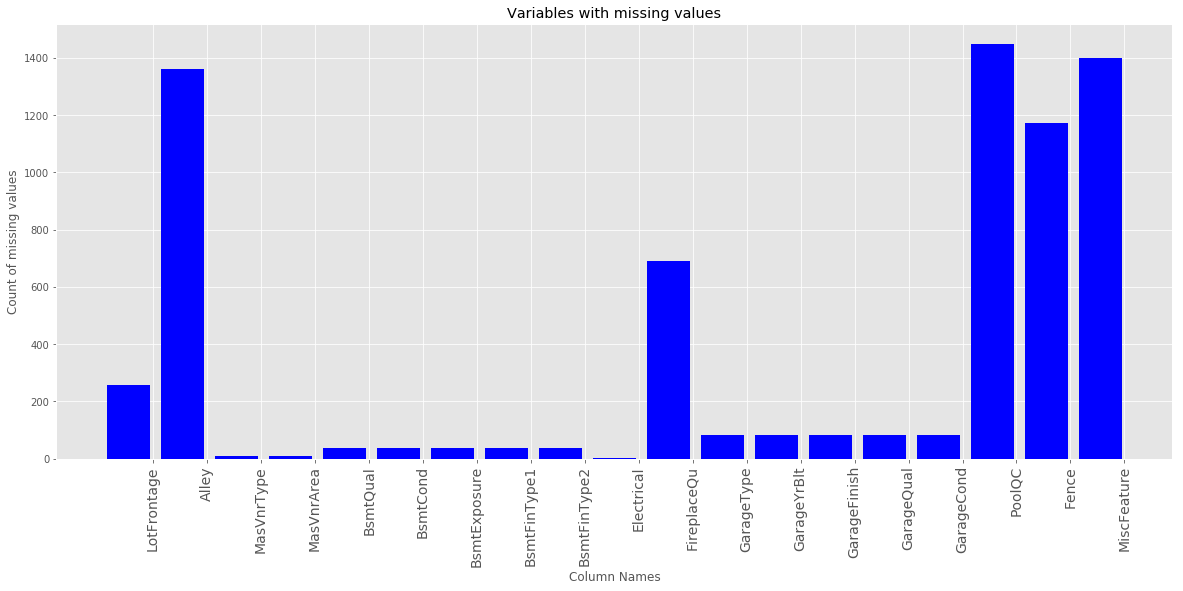

In [75]:
null_columns = train.columns[train.isnull().any()]


labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(train[col].isnull().sum())
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(20,8))
rects = ax.bar(ind, np.array(values), color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical',fontsize=14)
ax.set_ylabel("Count of missing values")
ax.set_xlabel("Column Names")
ax.set_title("Variables with missing values");
plt.show()

All features in the train data set illiustrated in graphs

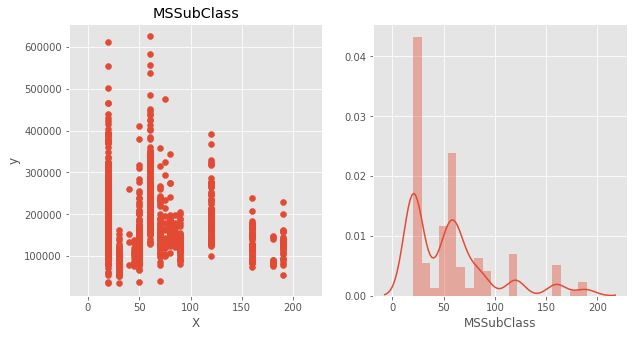

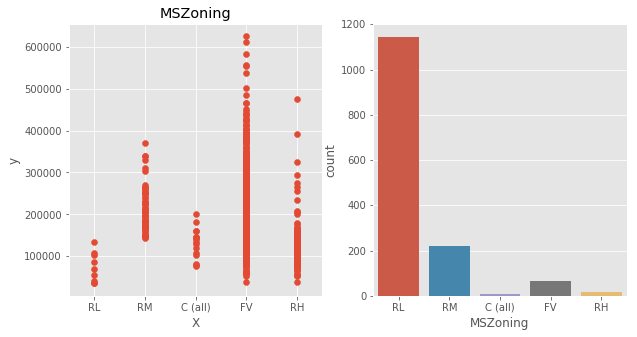

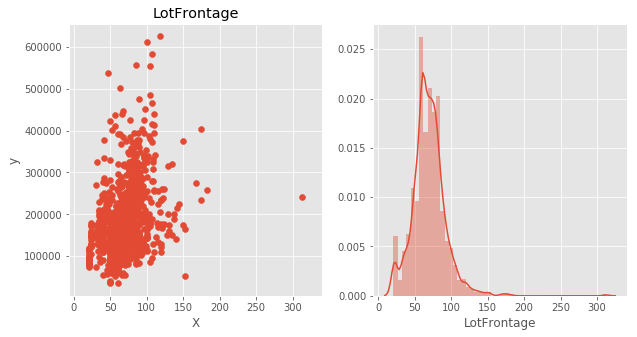

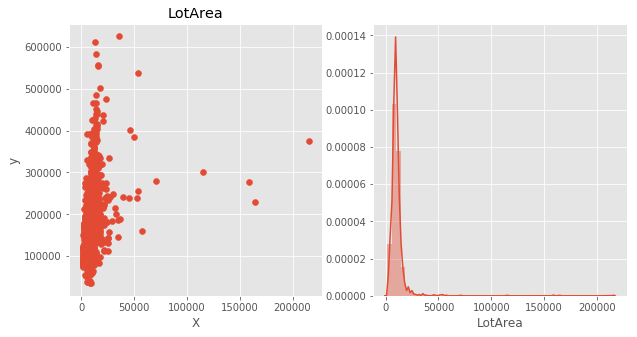

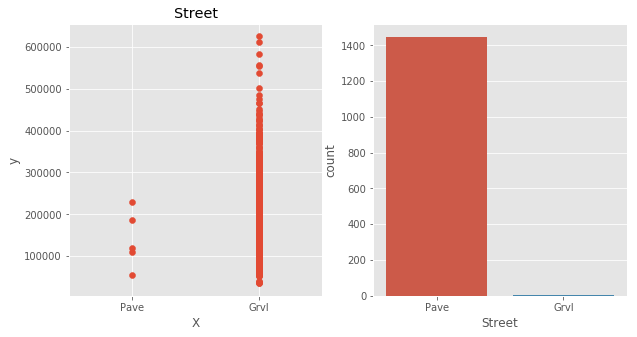

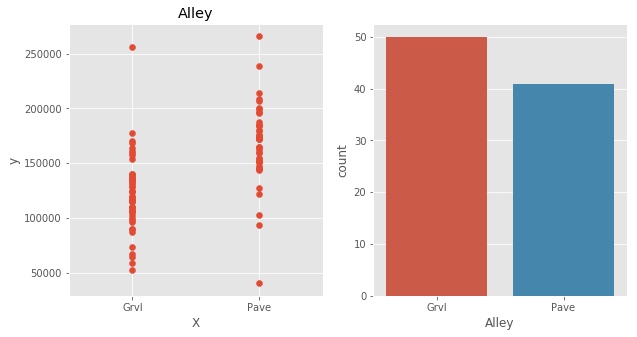

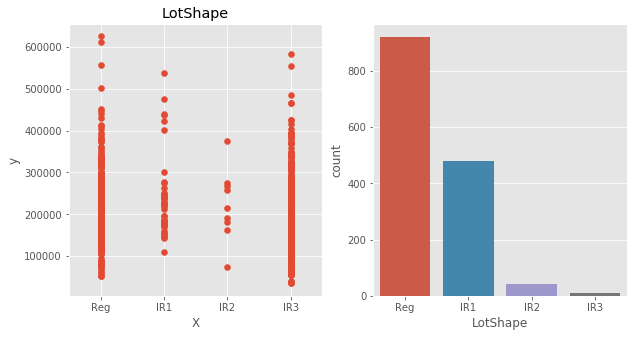

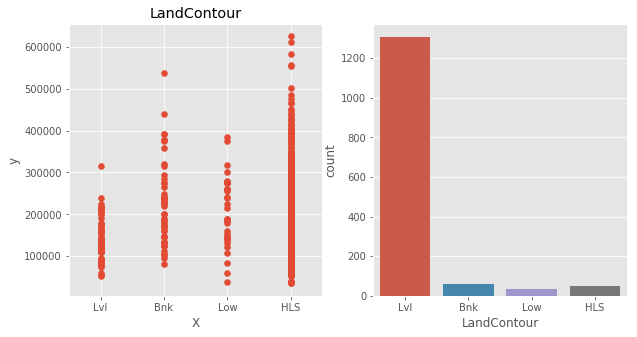

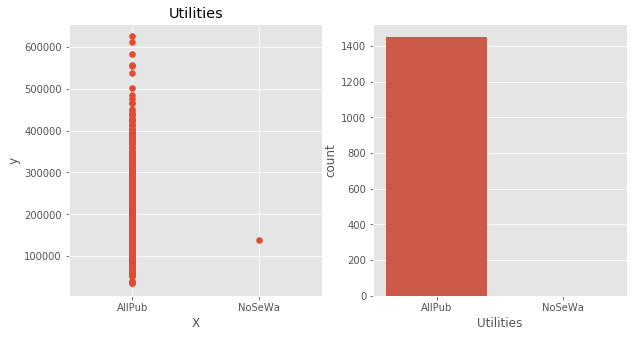

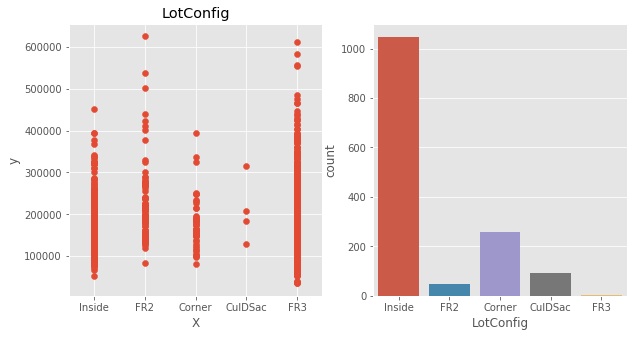

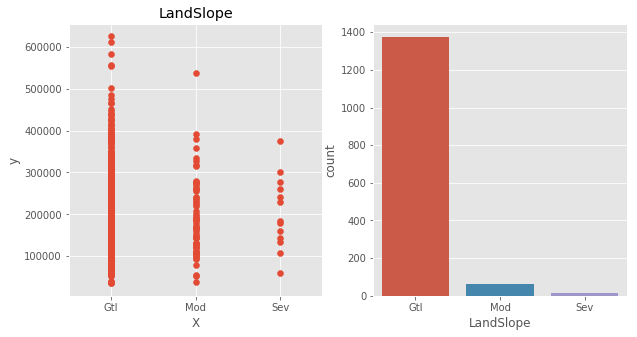

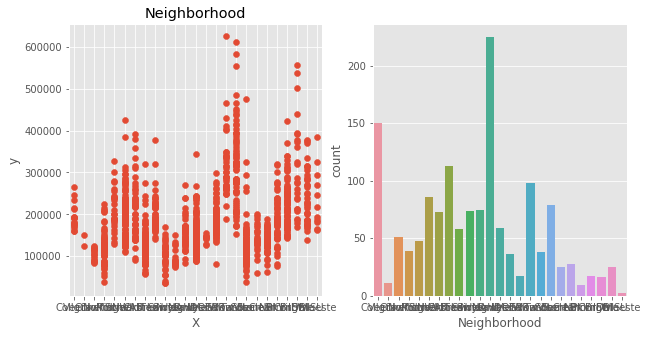

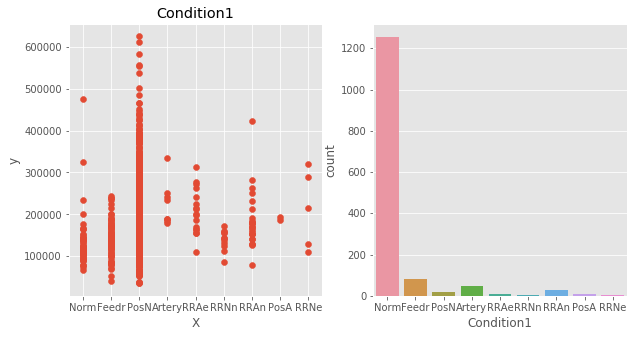

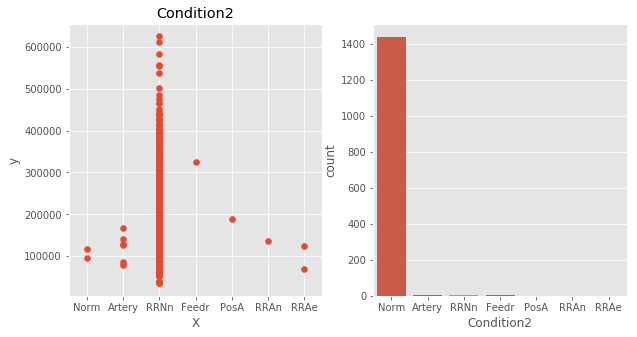

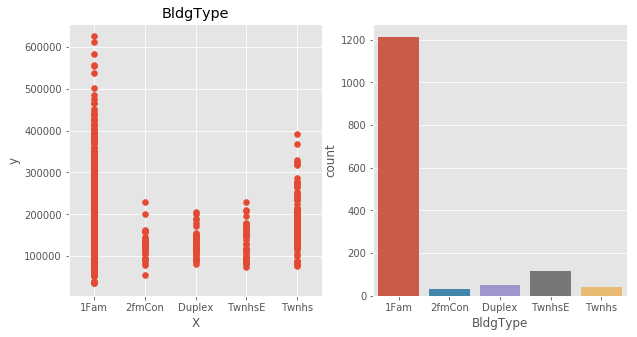

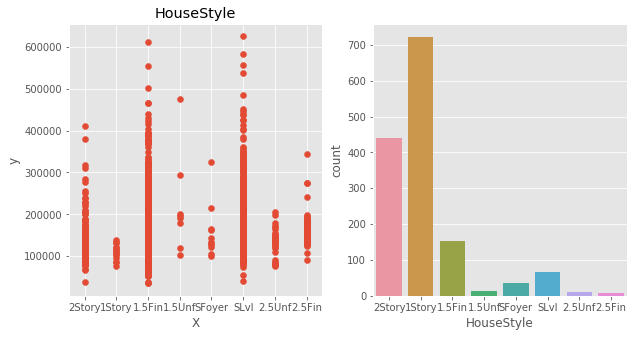

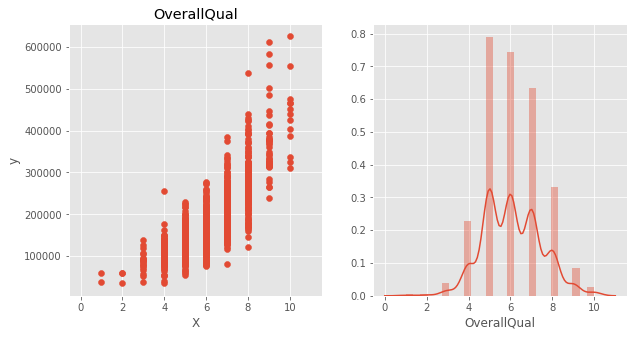

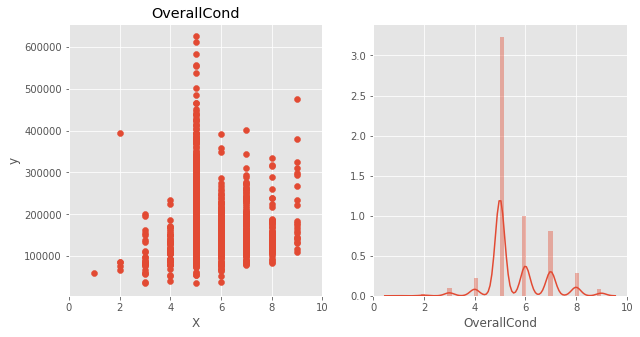

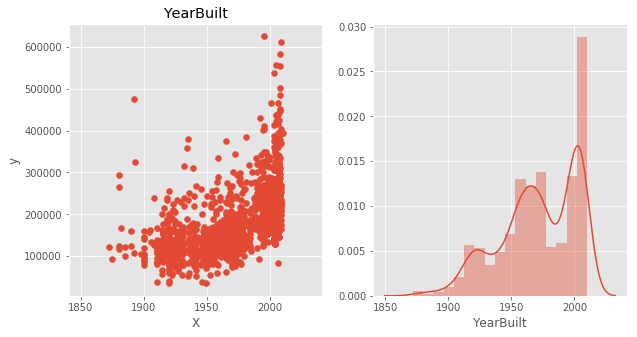

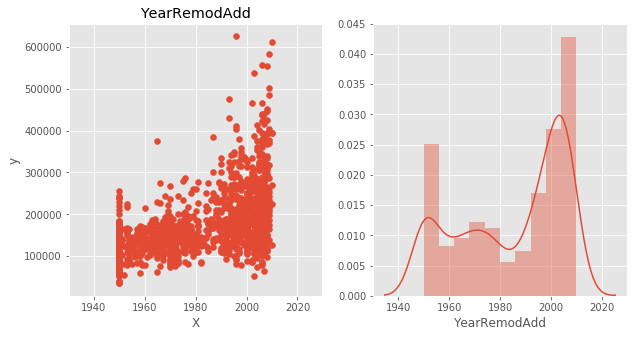

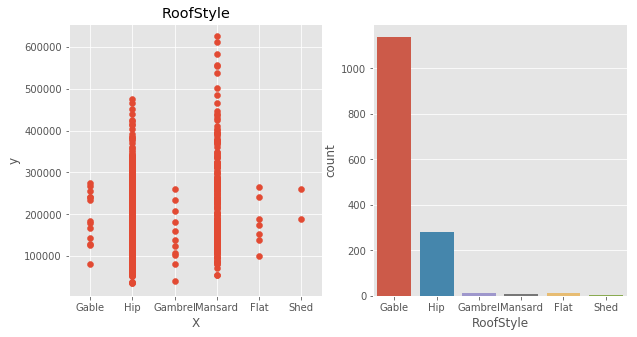

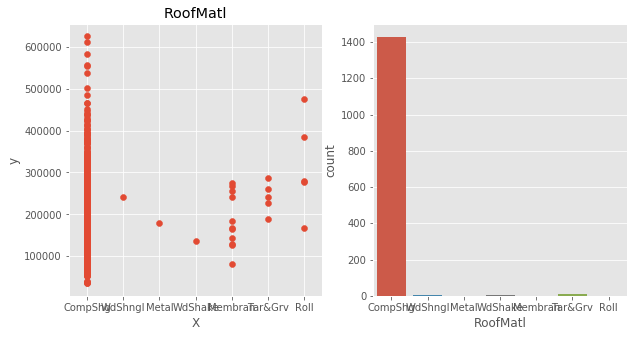

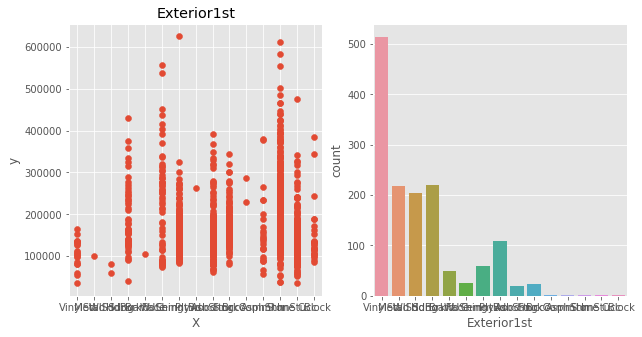

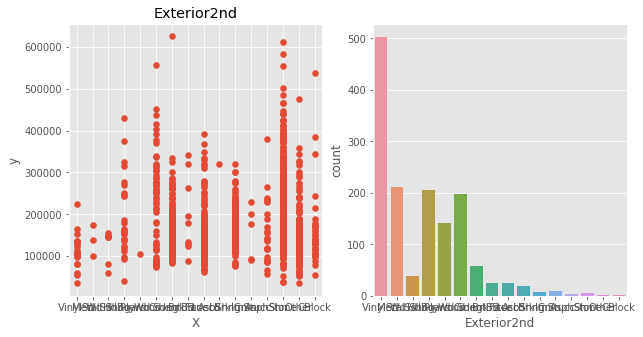

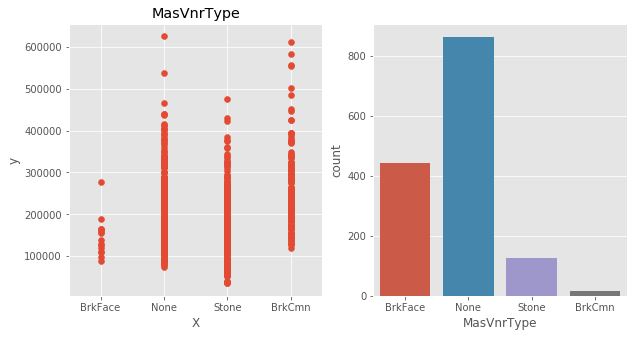

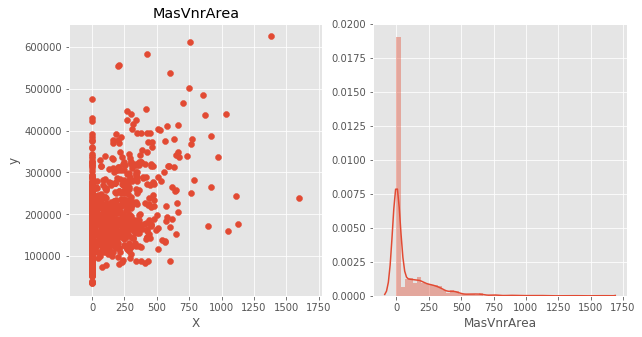

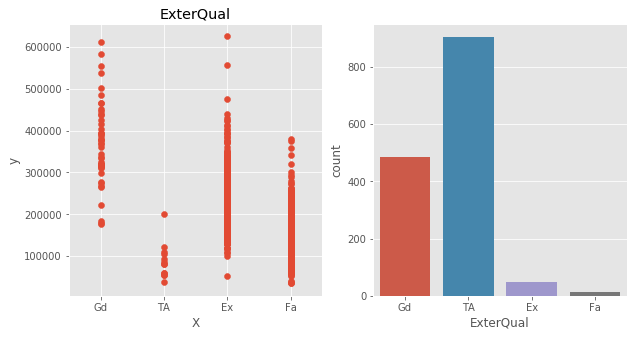

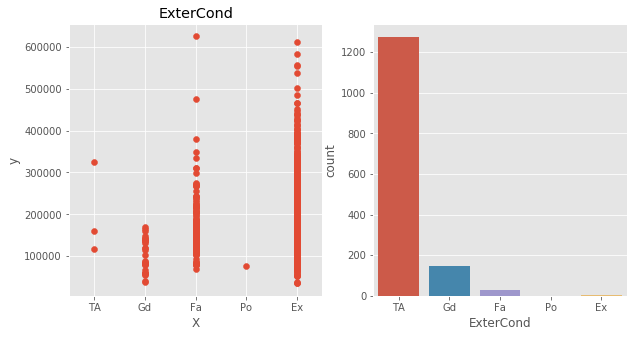

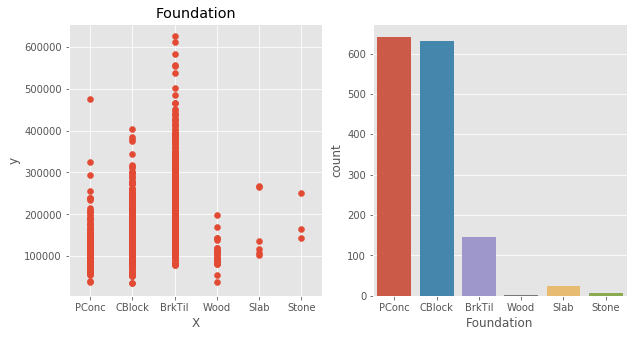

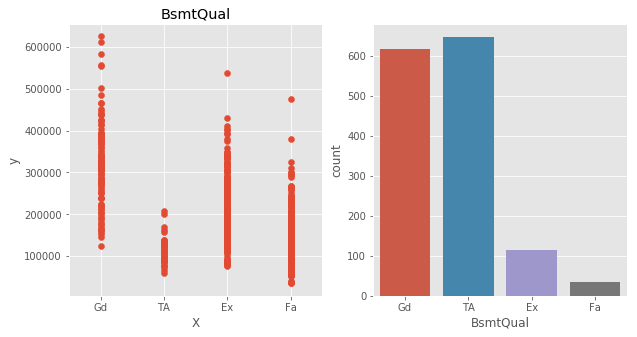

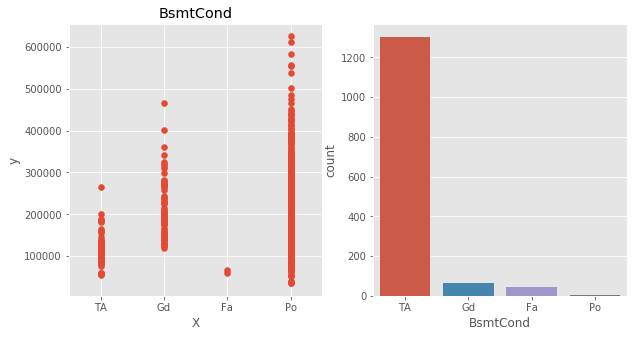

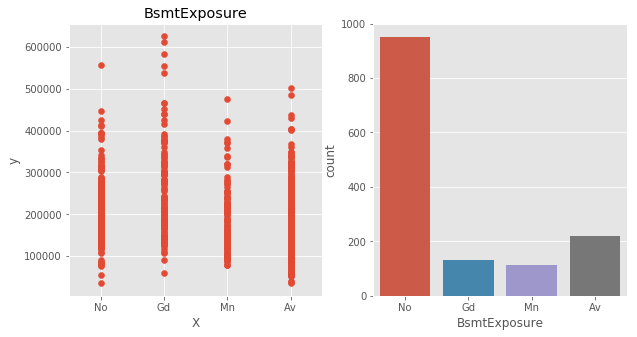

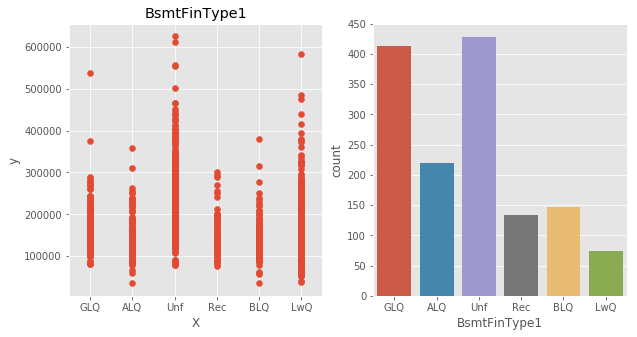

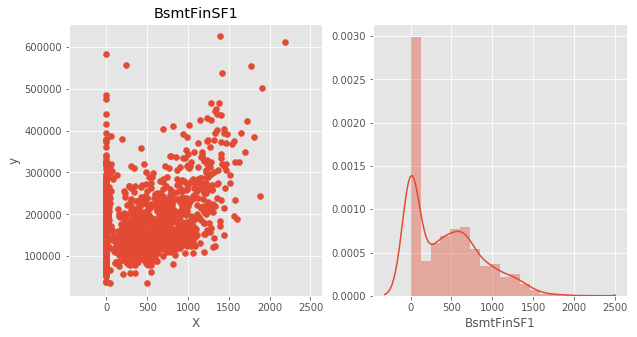

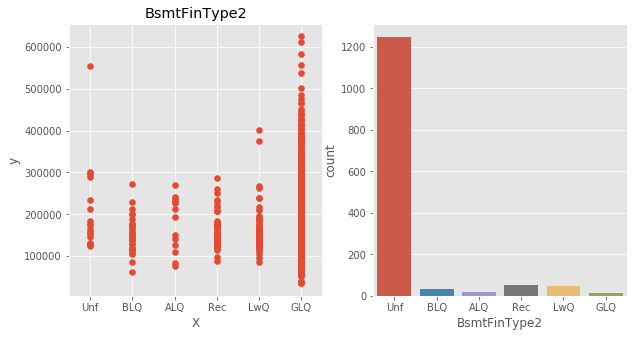

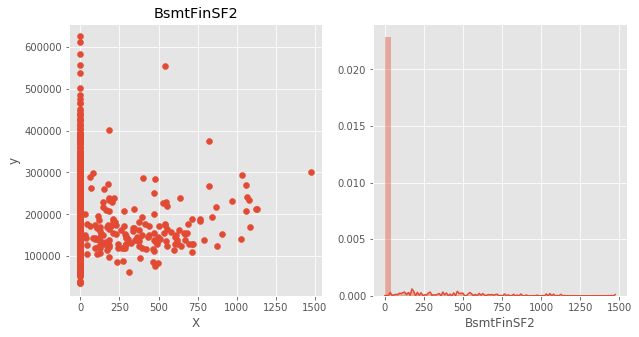

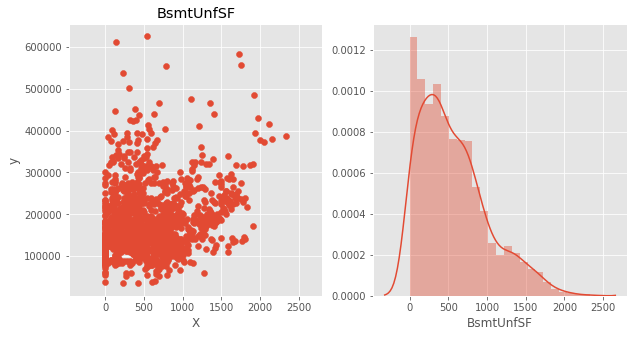

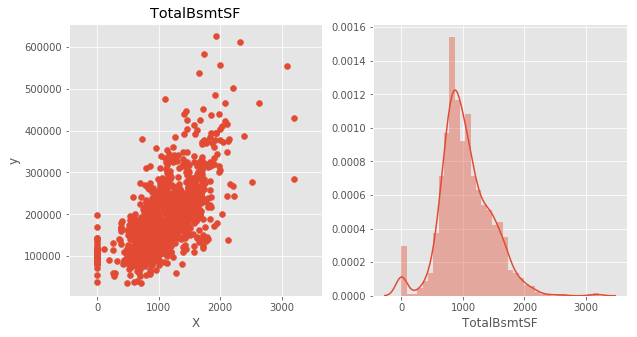

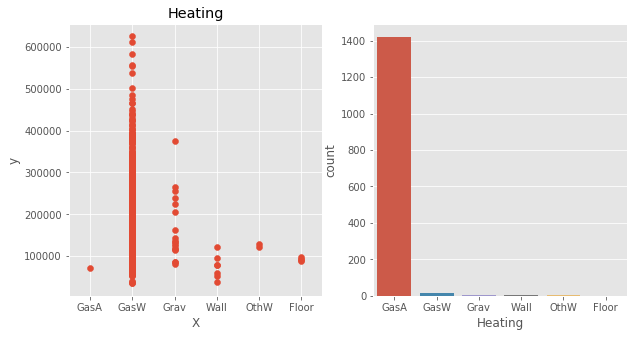

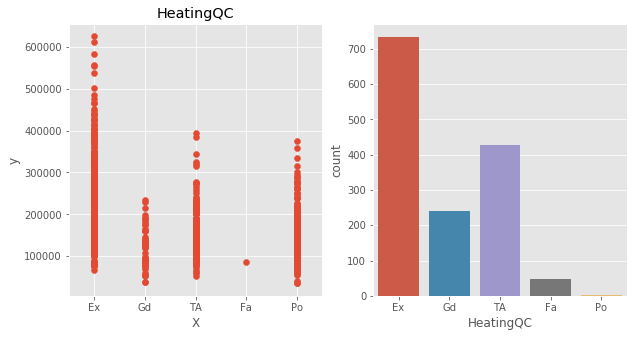

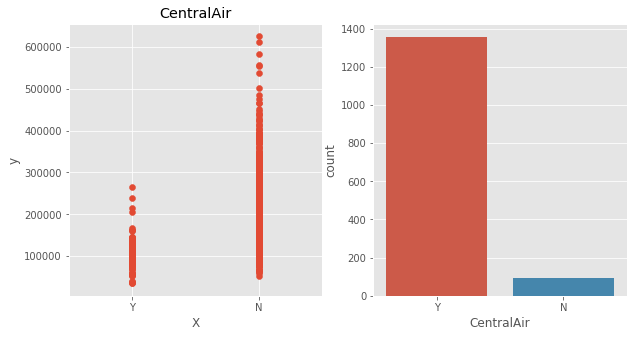

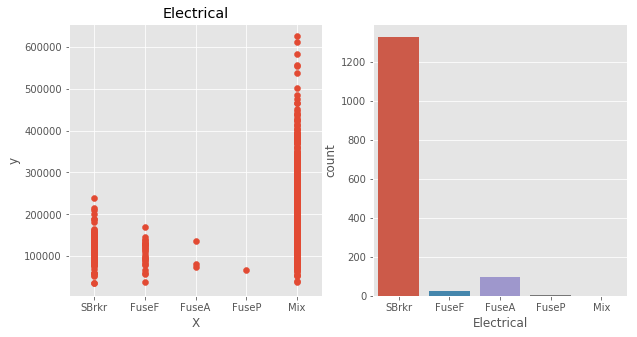

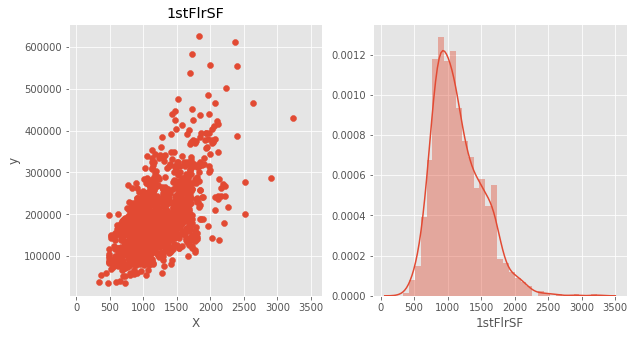

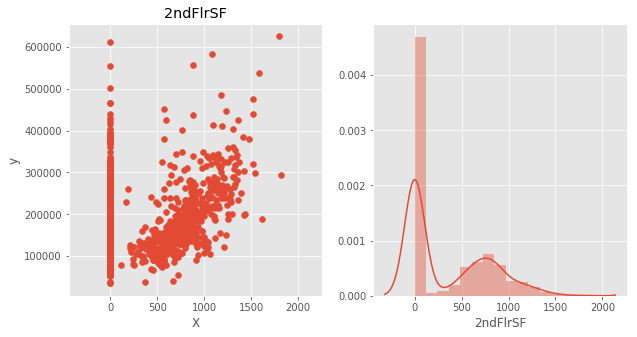

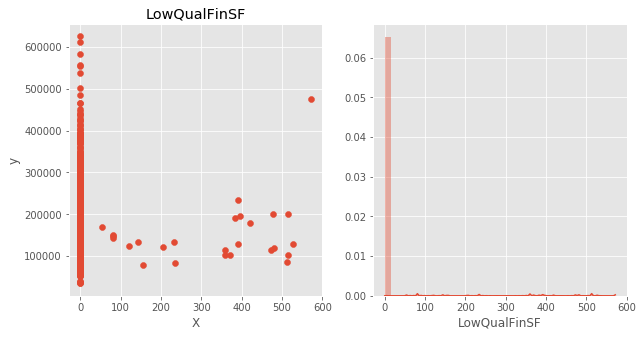

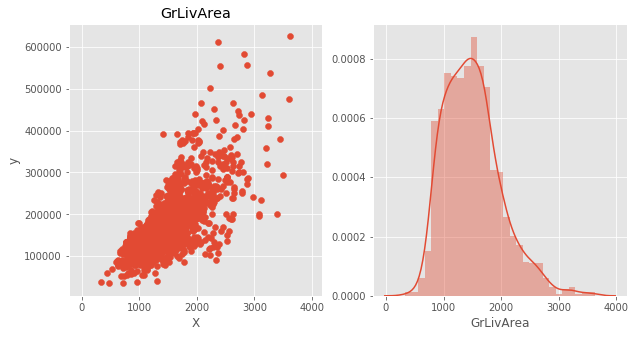

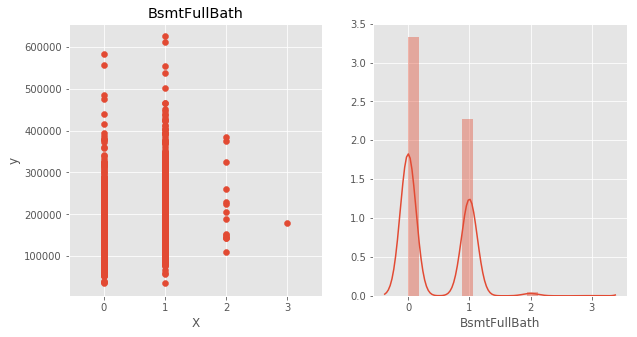

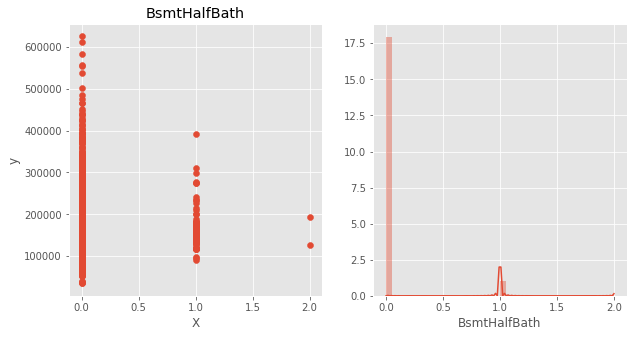

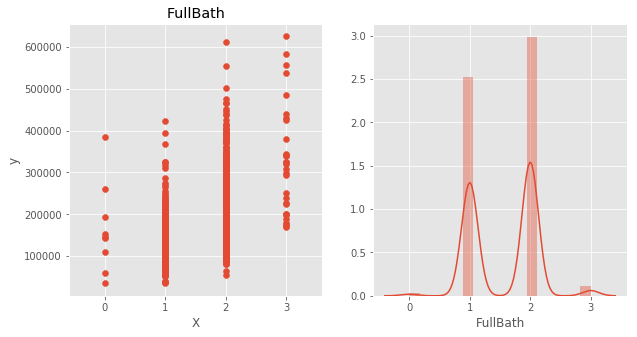

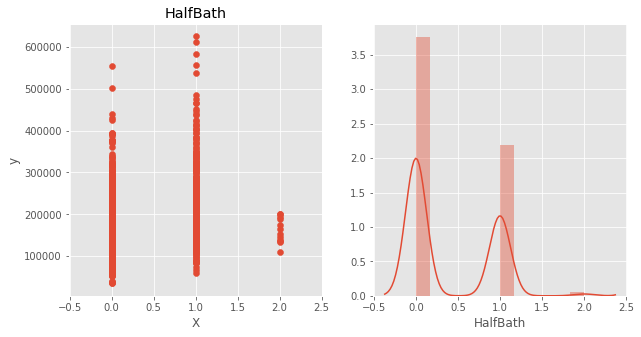

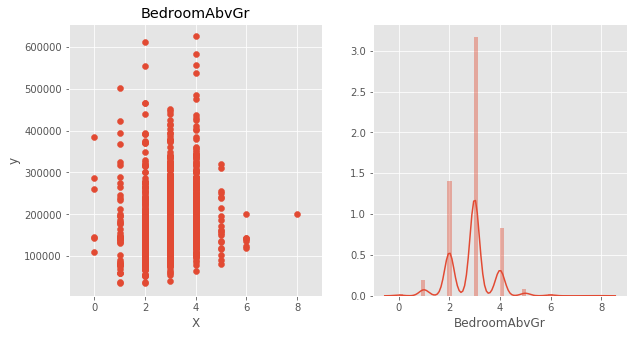

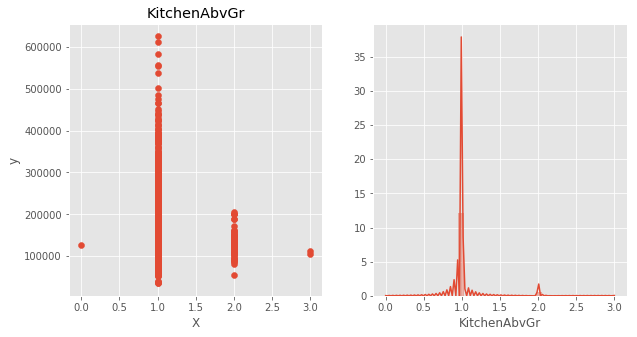

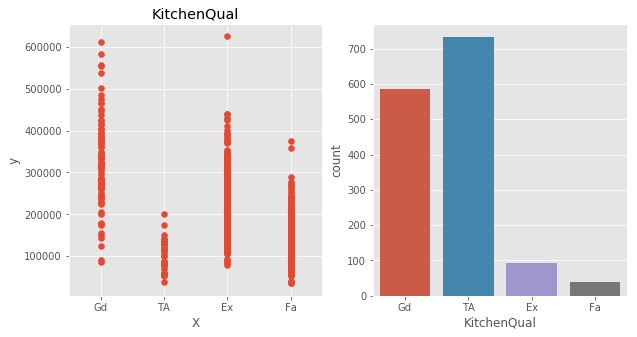

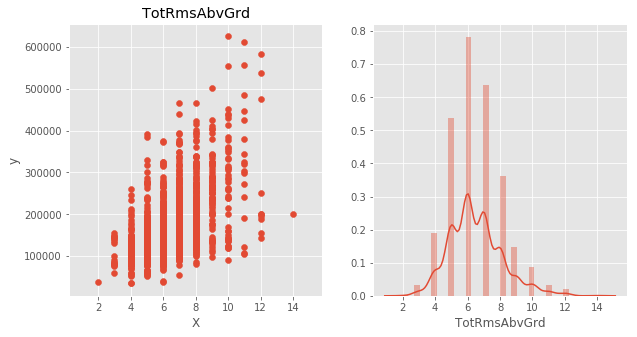

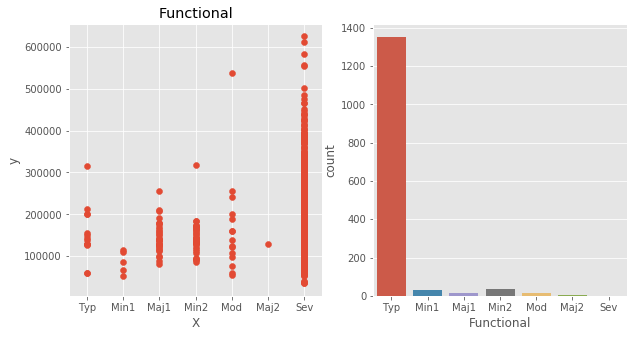

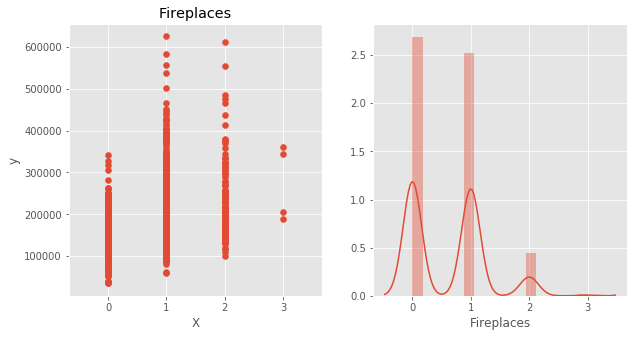

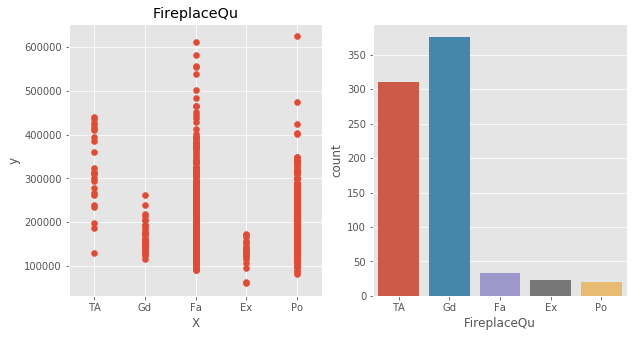

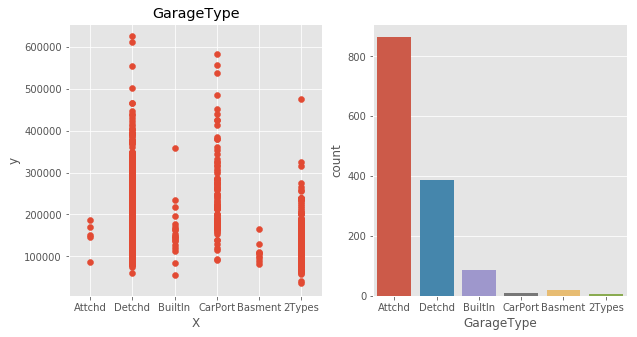

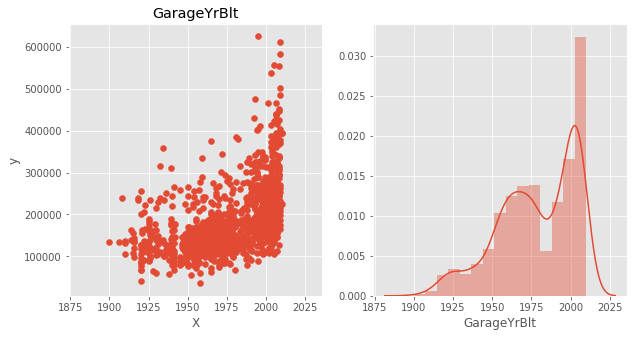

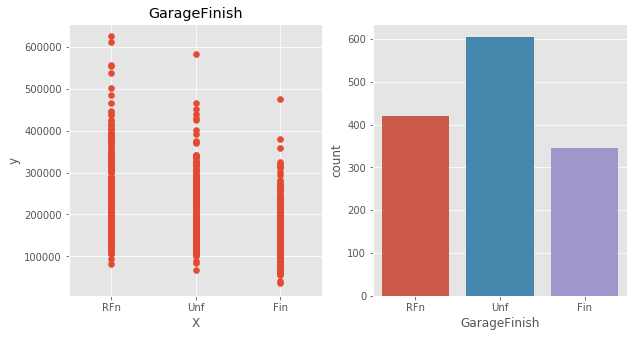

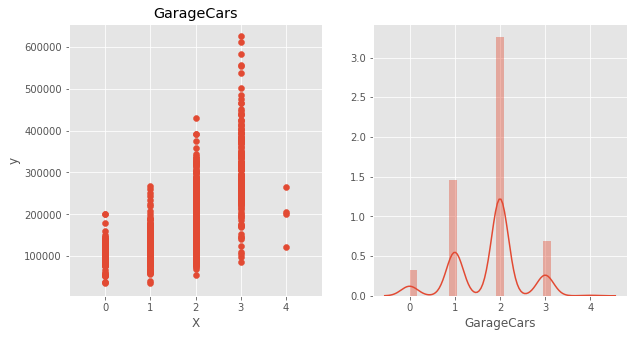

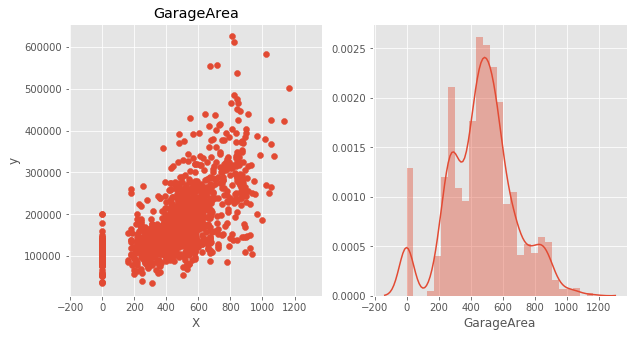

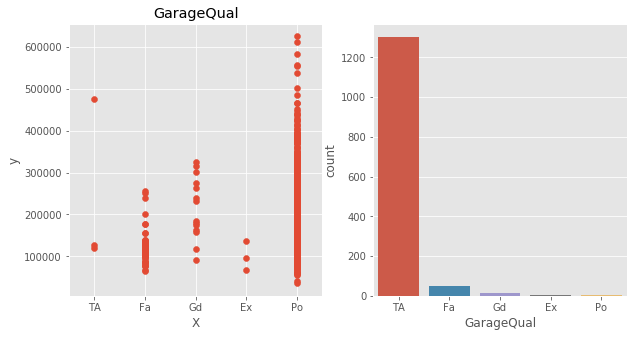

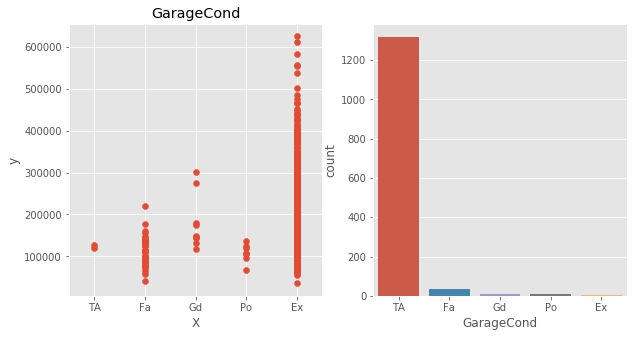

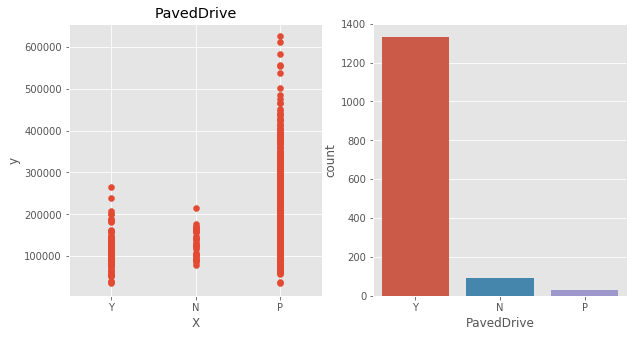

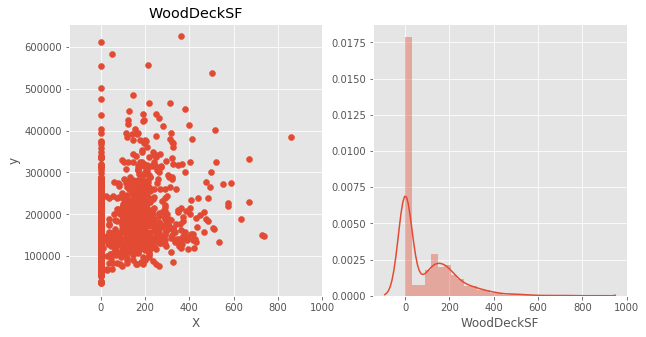

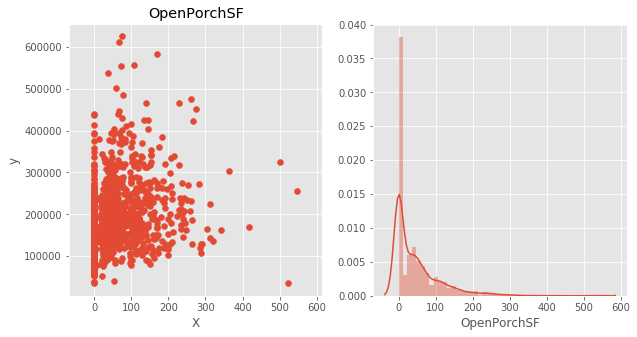

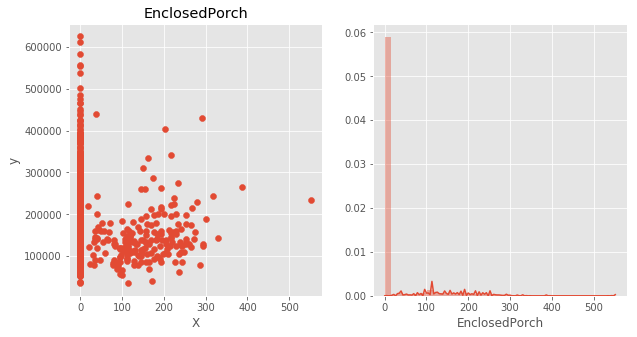

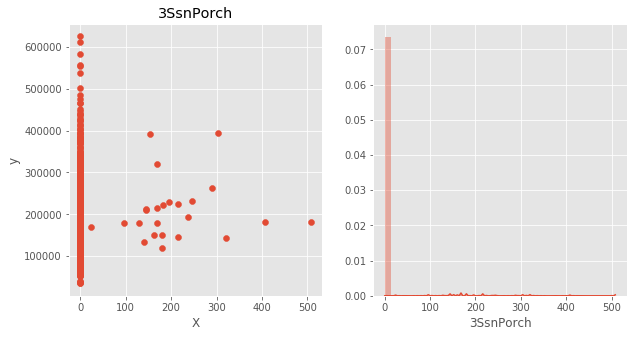

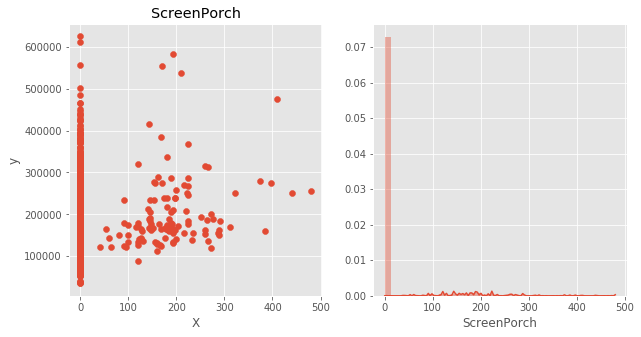

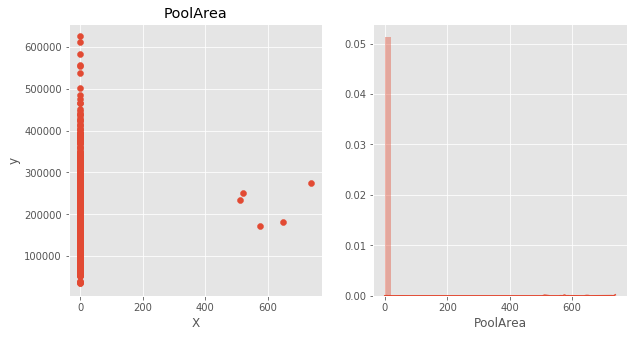

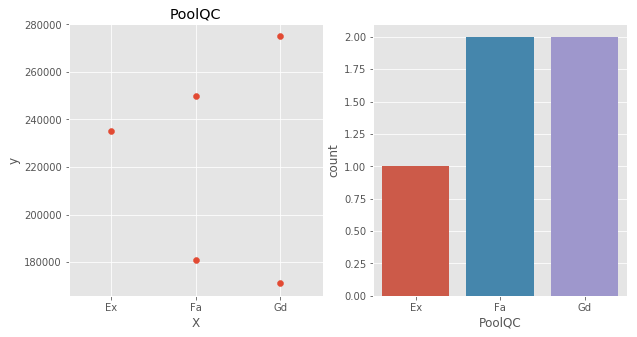

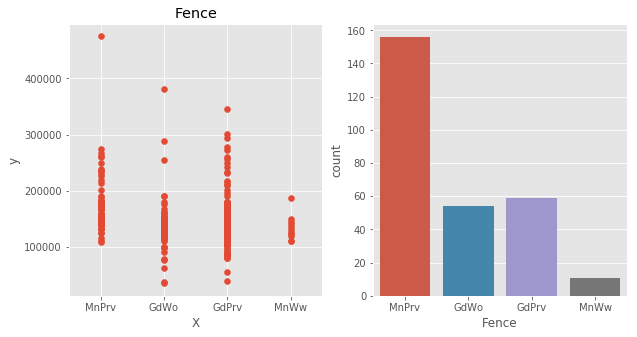

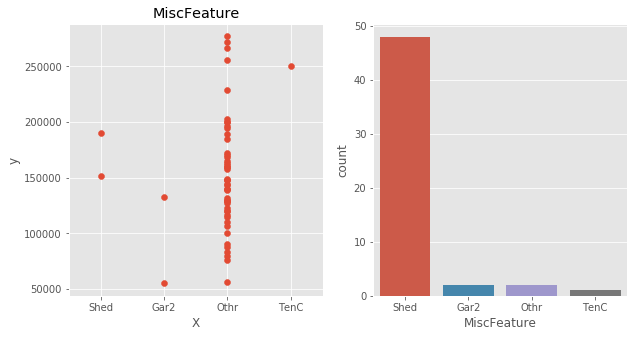

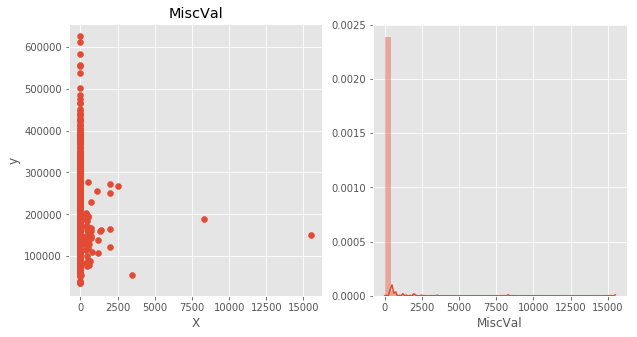

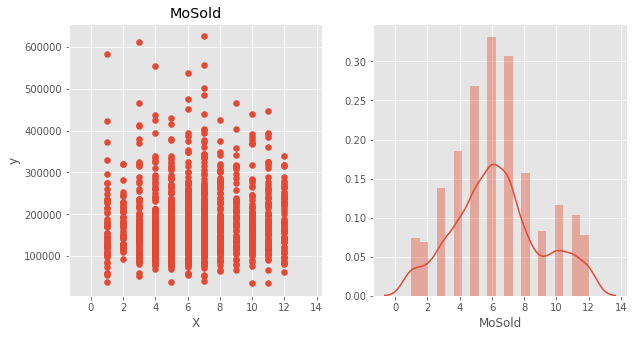

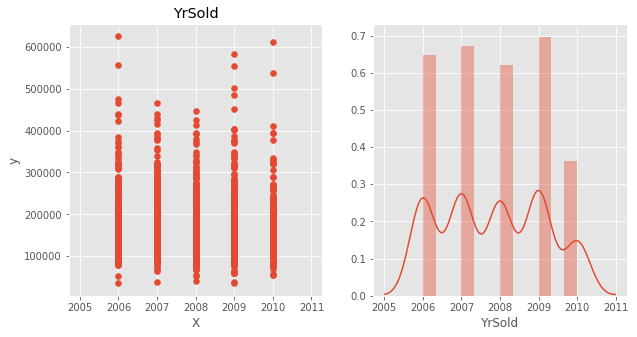

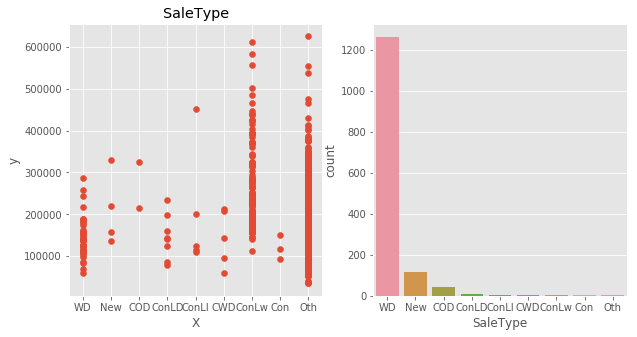

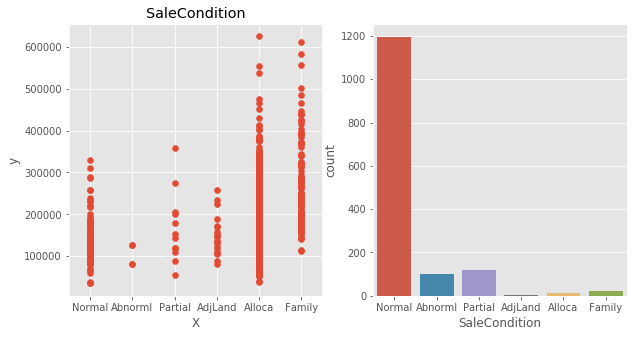

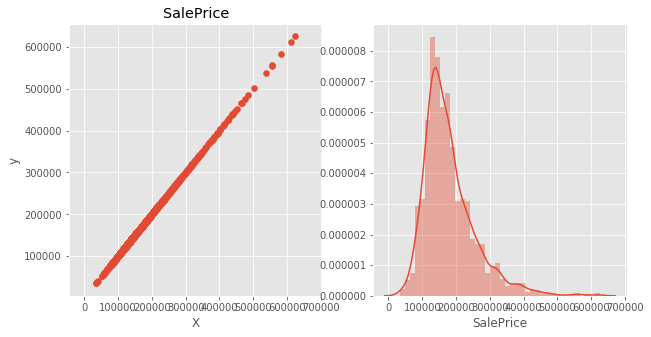

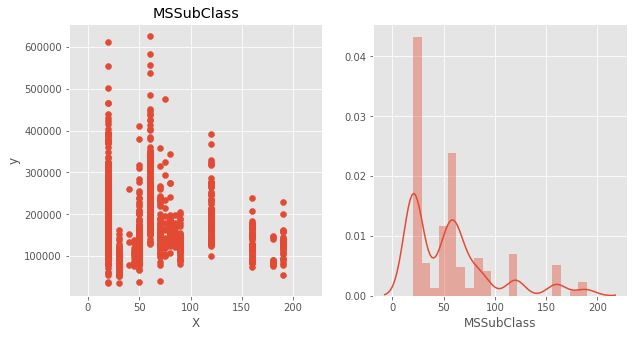

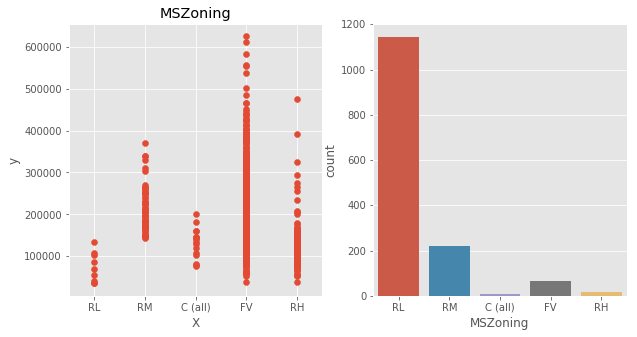

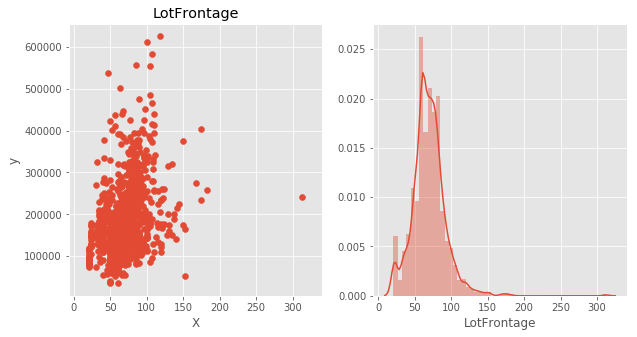

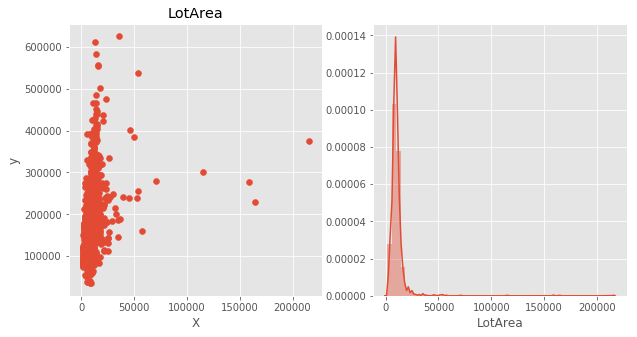

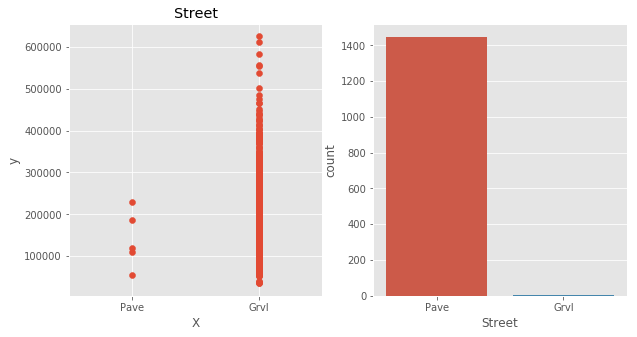

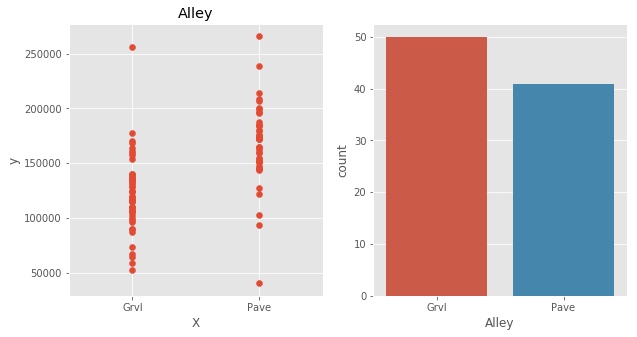

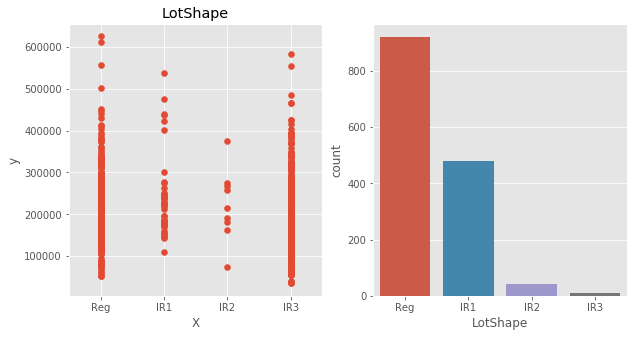

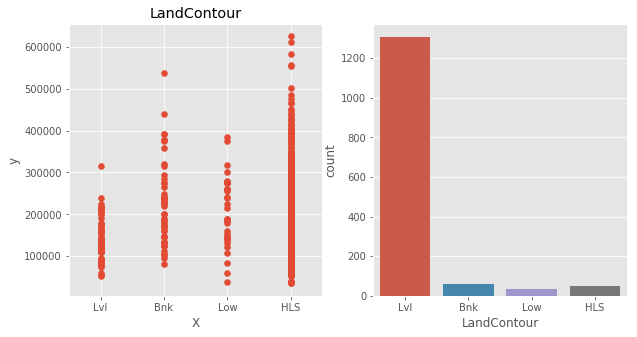

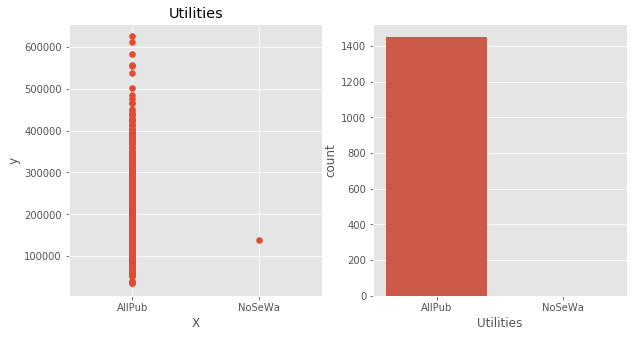

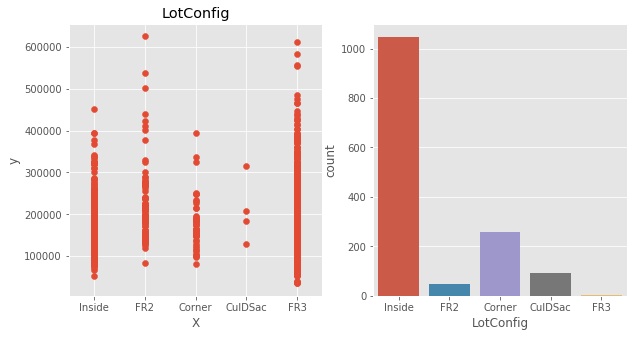

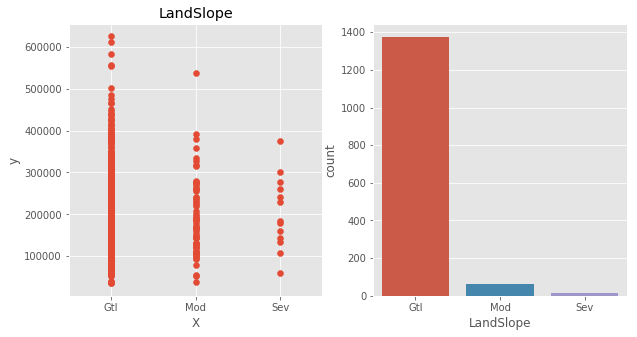

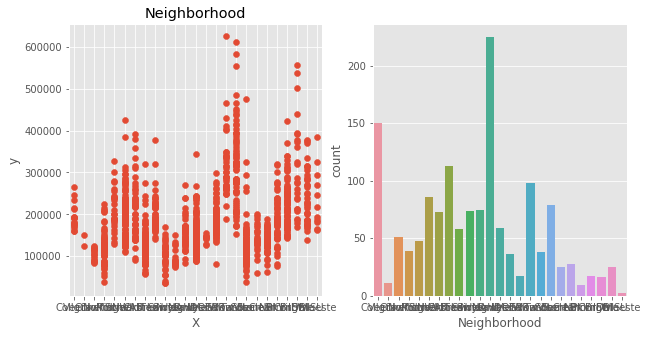

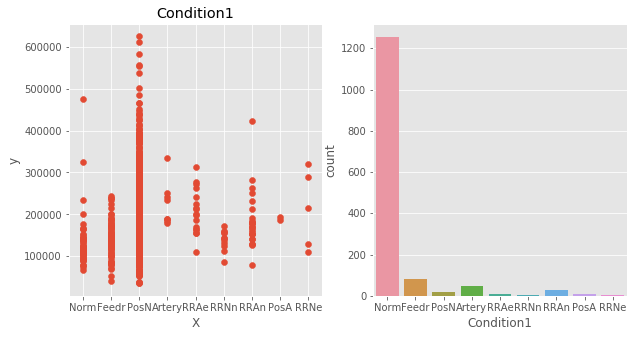

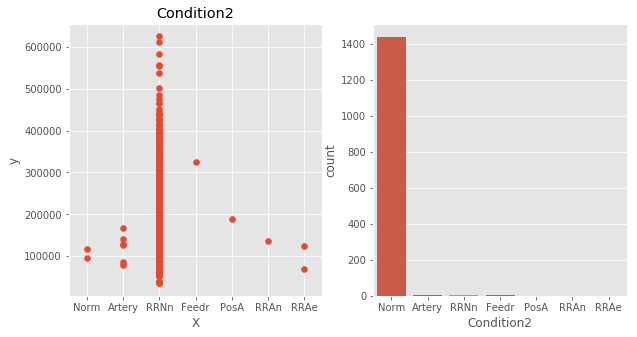

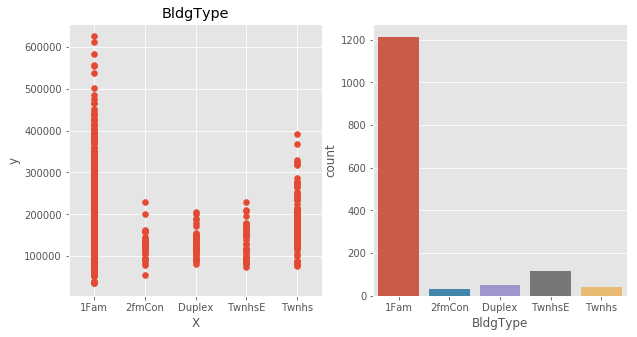

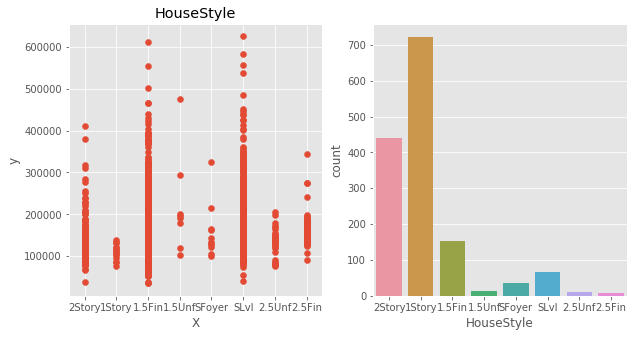

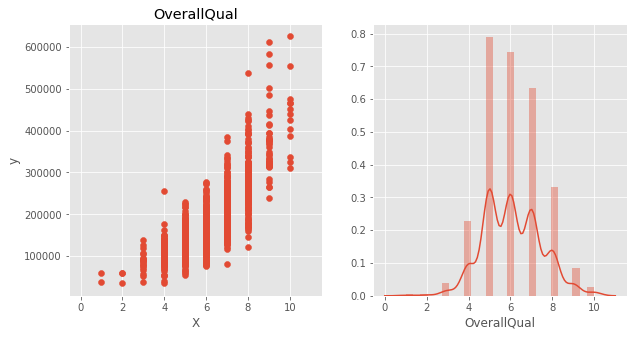

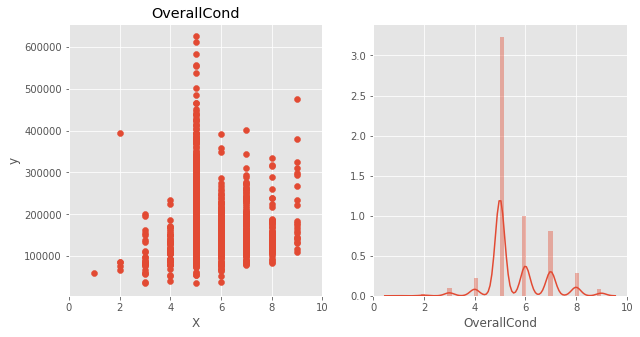

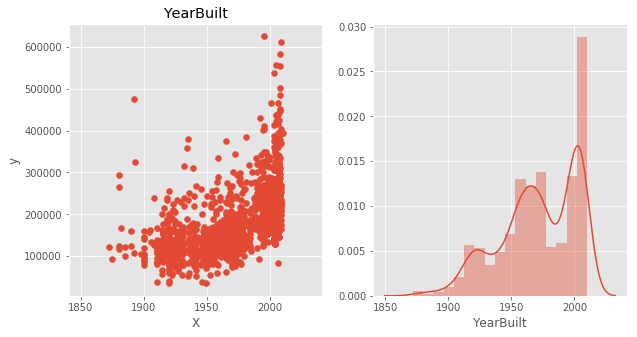

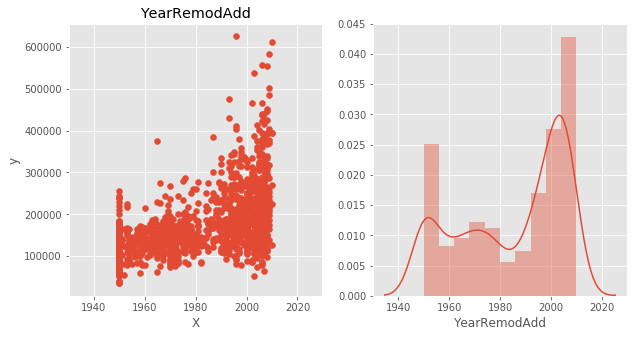

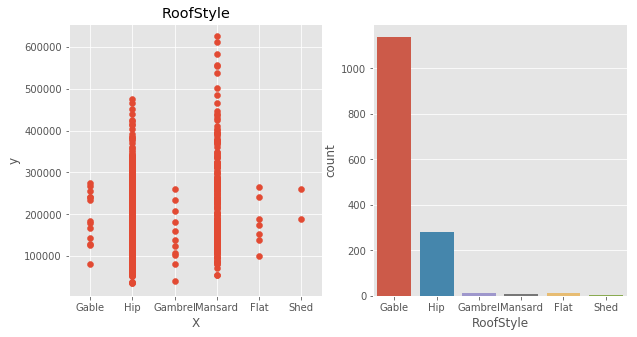

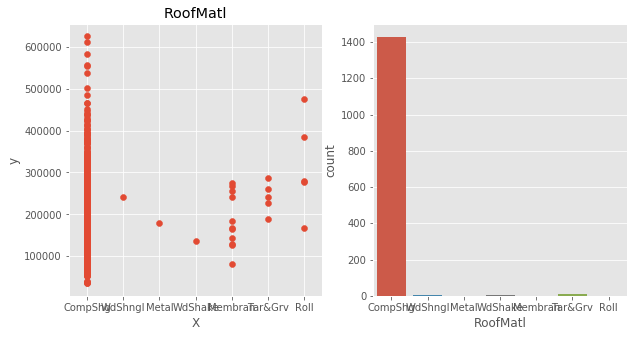

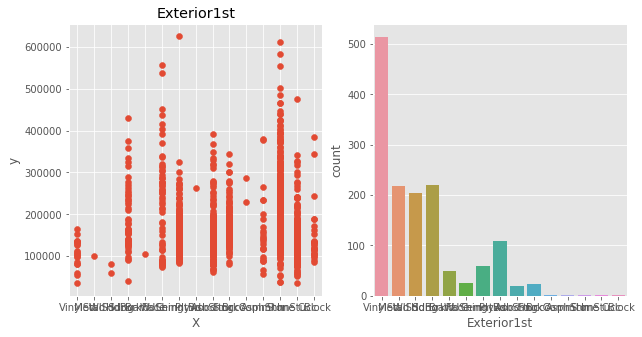

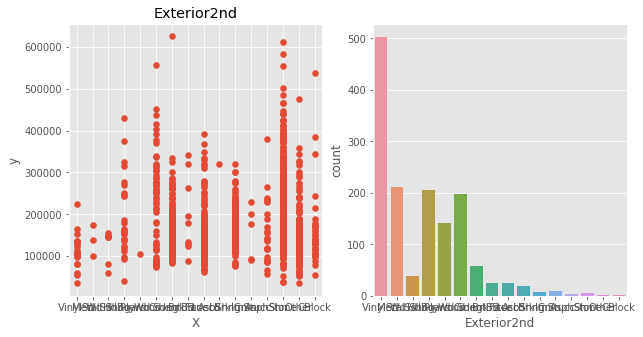

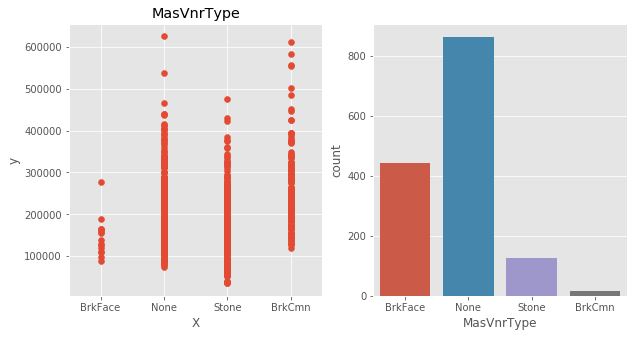

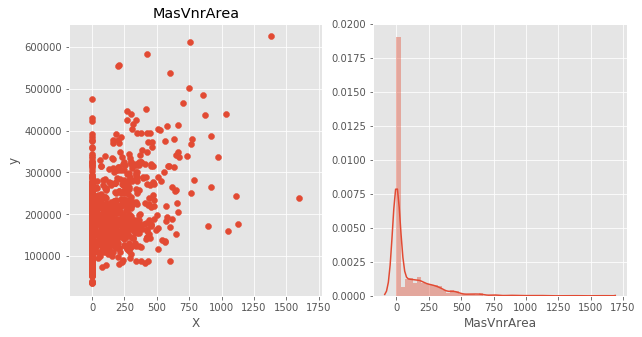

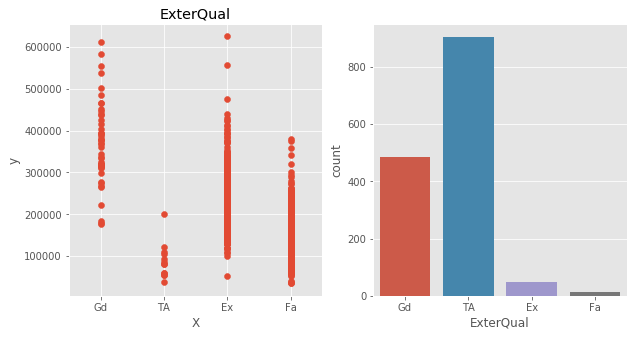

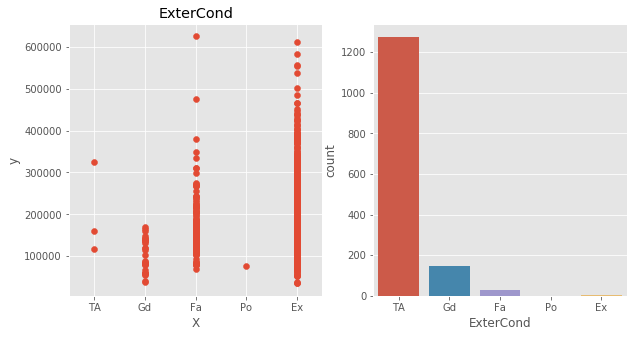

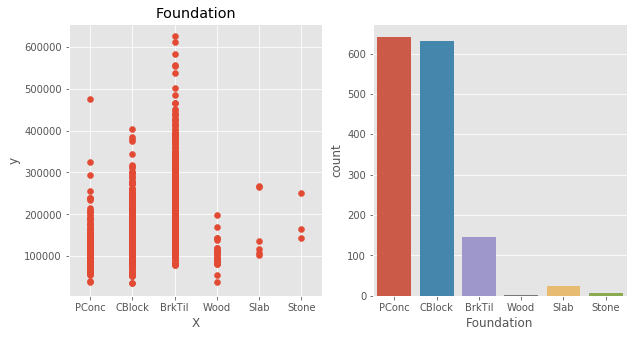

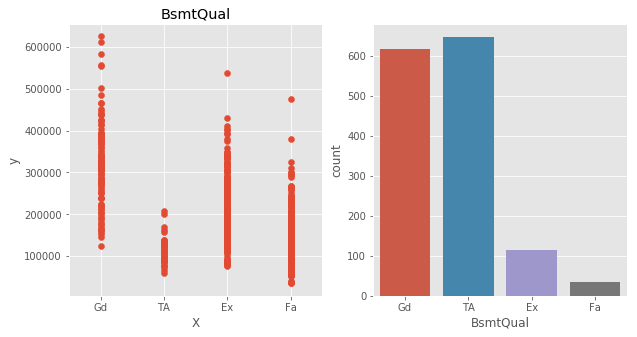

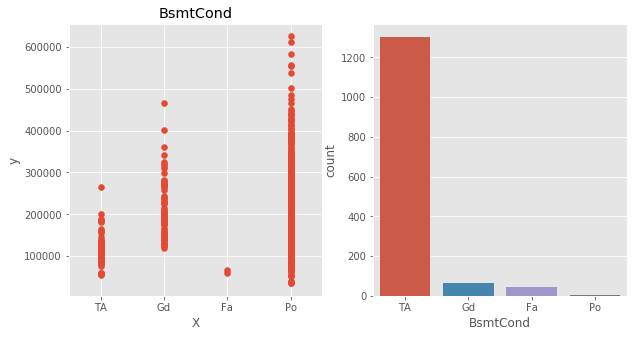

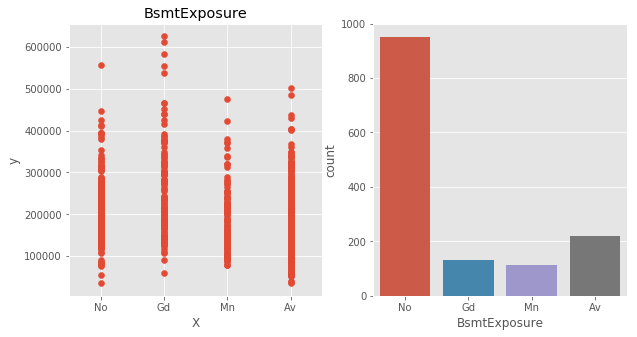

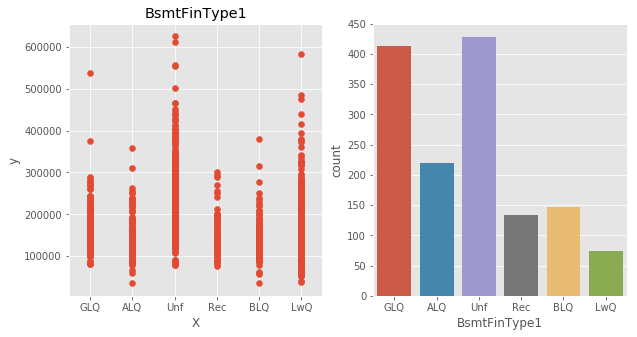

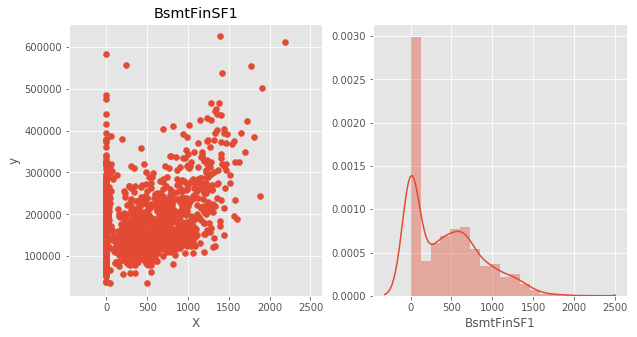

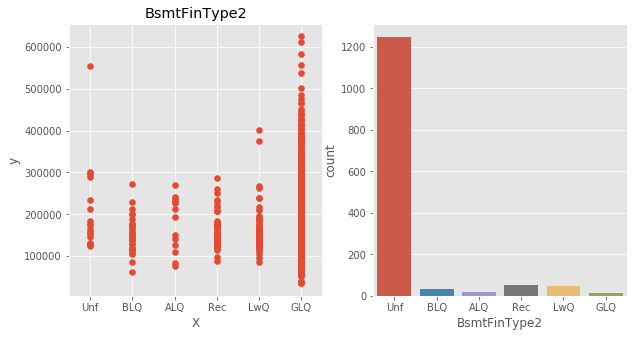

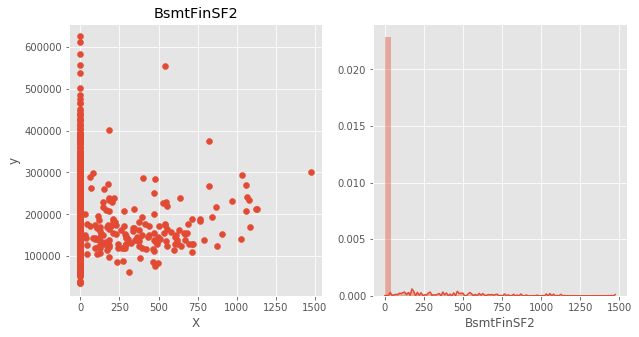

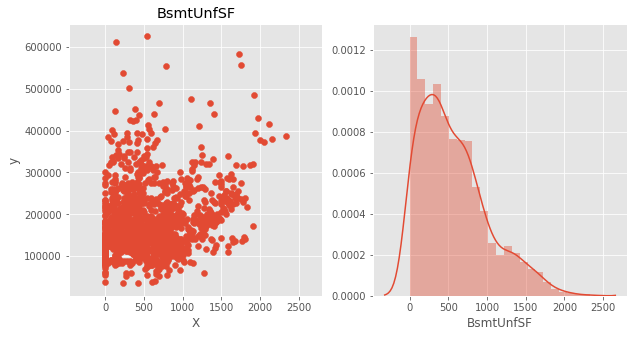

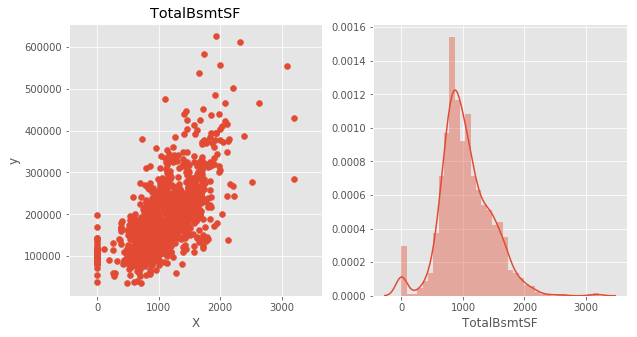

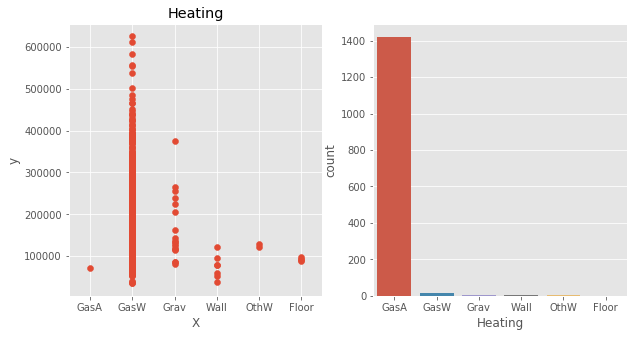

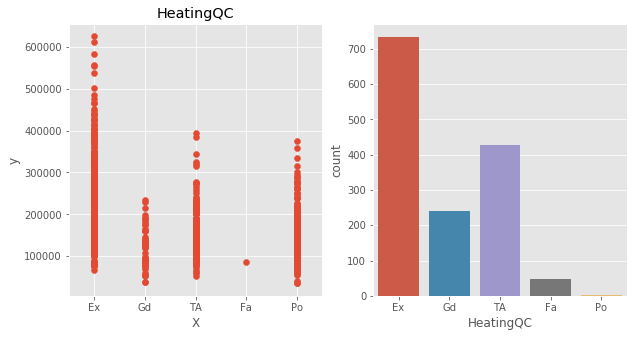

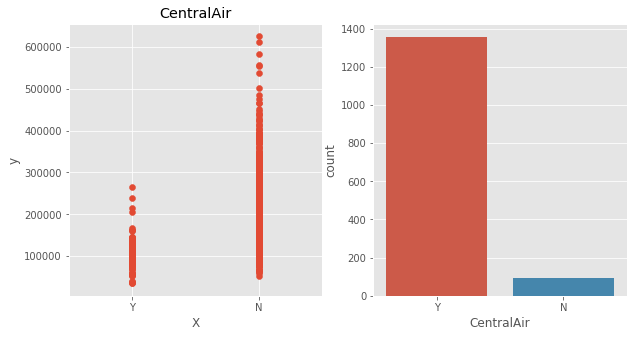

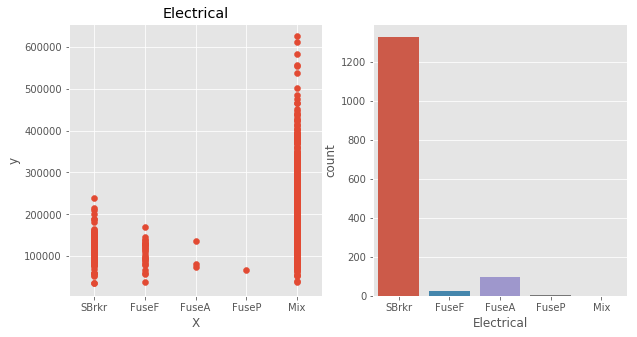

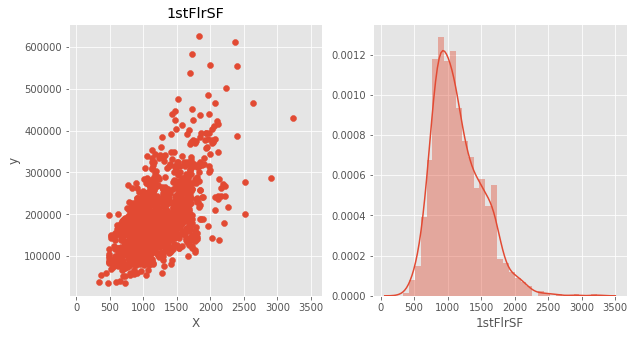

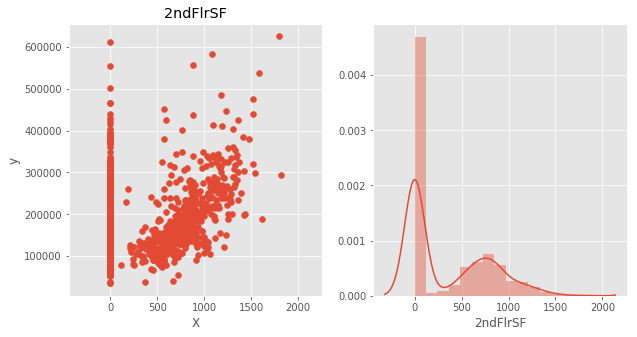

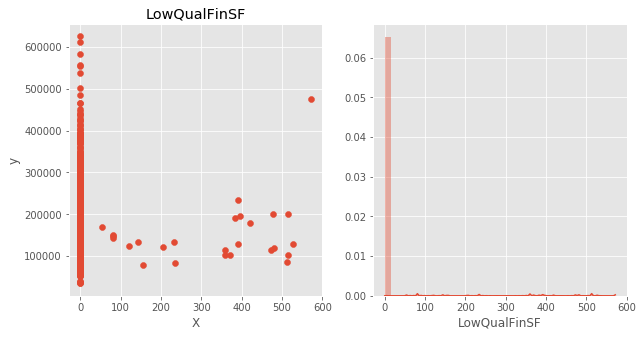

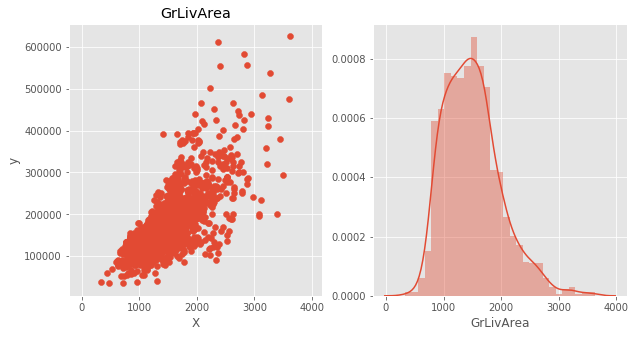

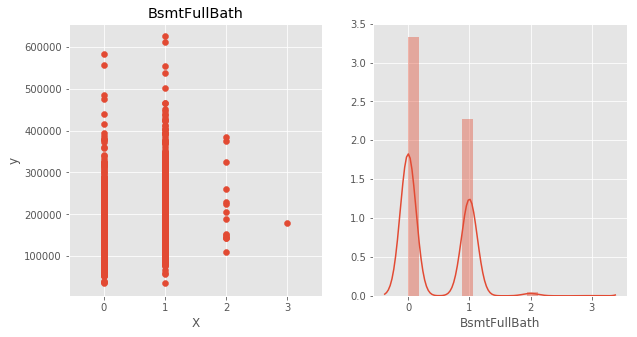

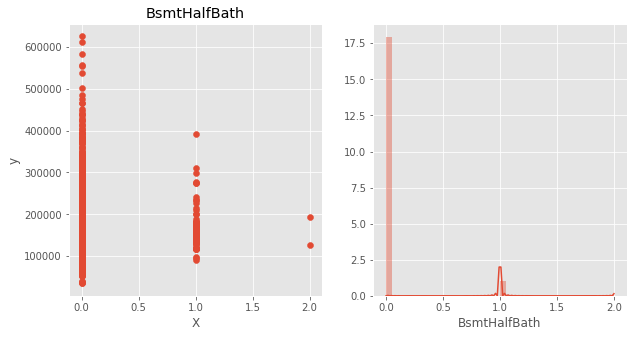

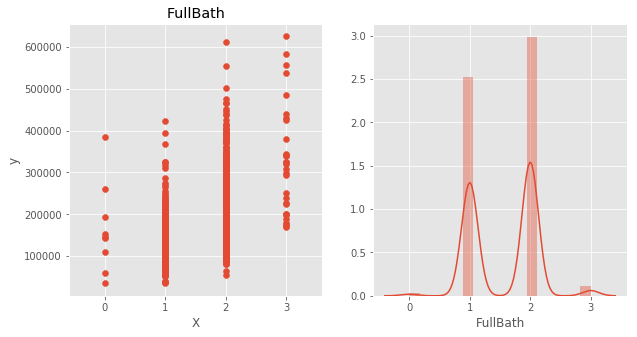

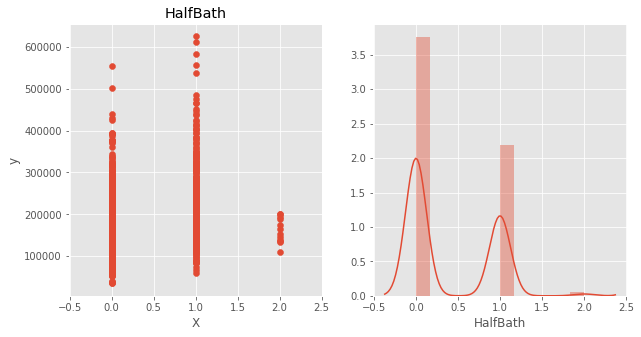

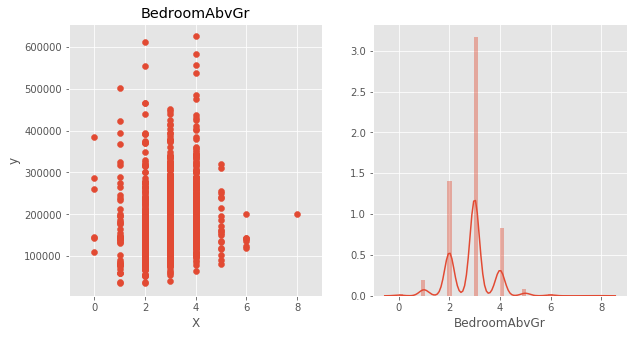

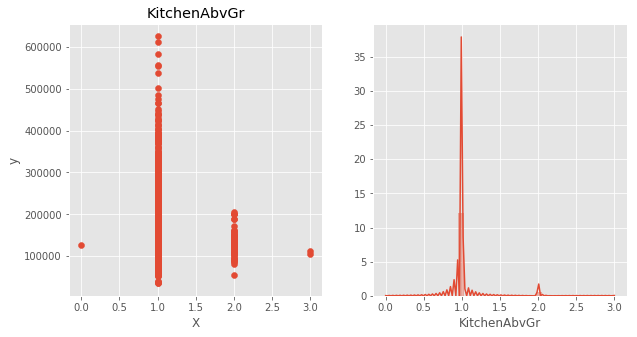

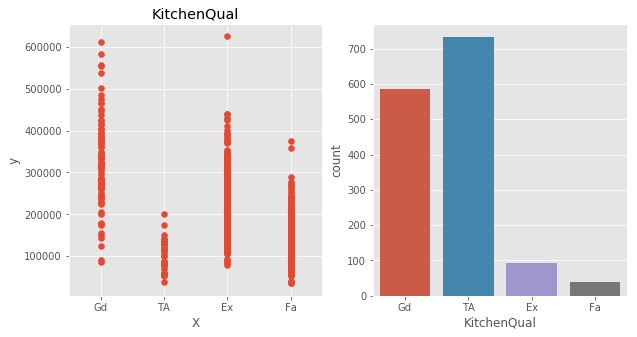

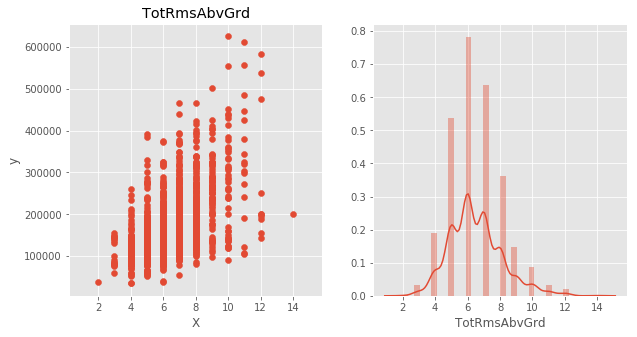

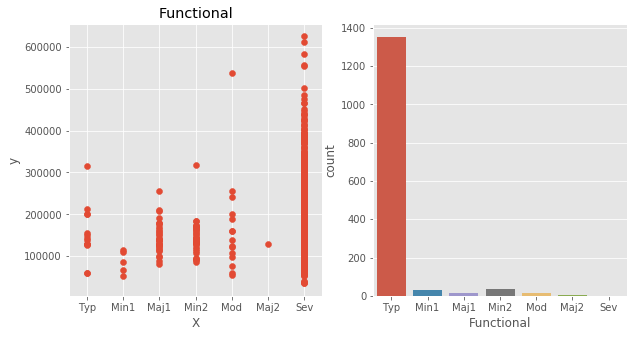

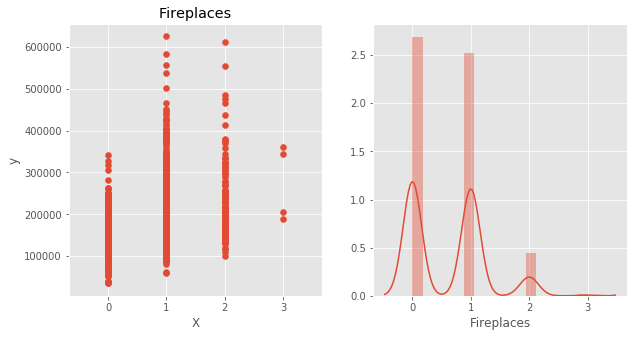

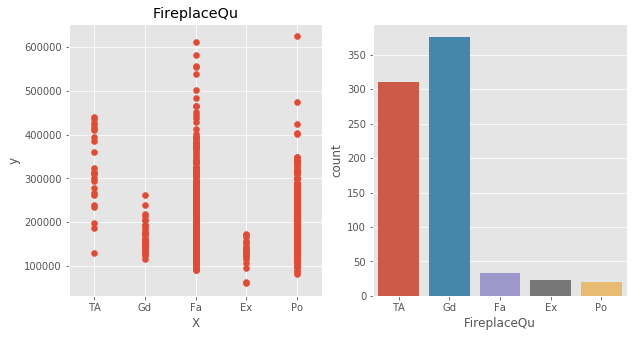

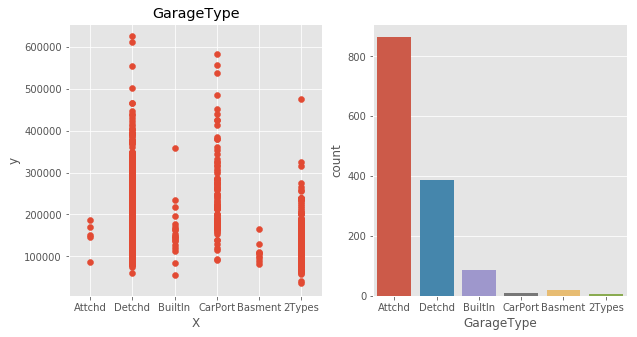

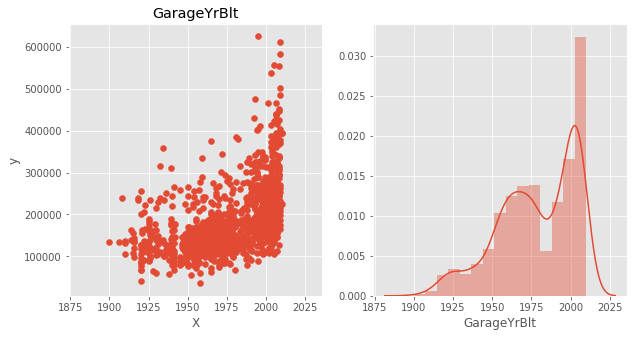

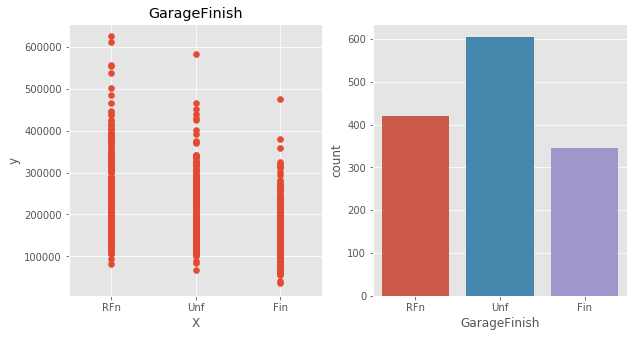

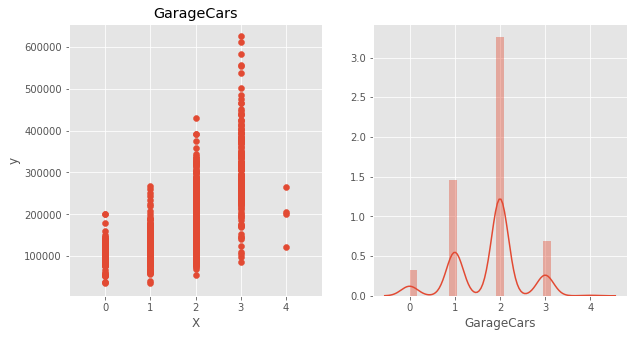

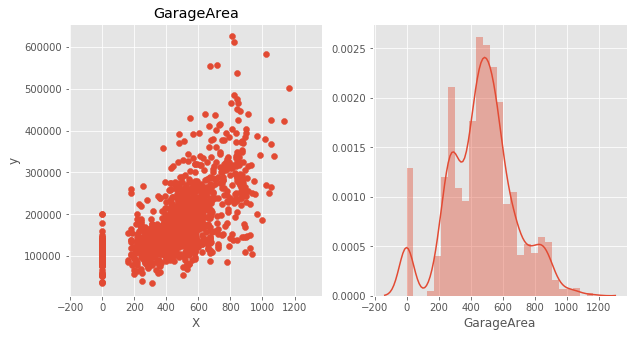

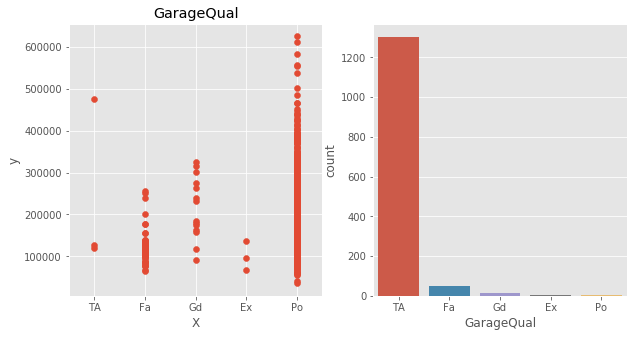

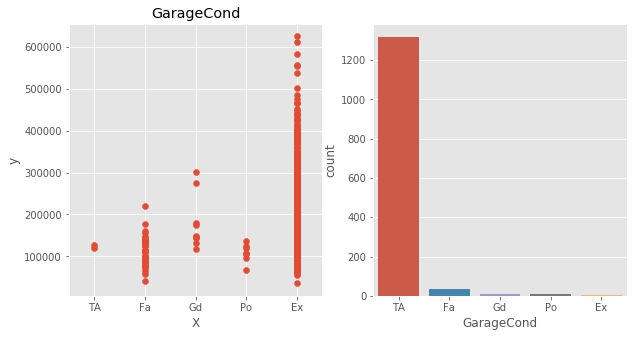

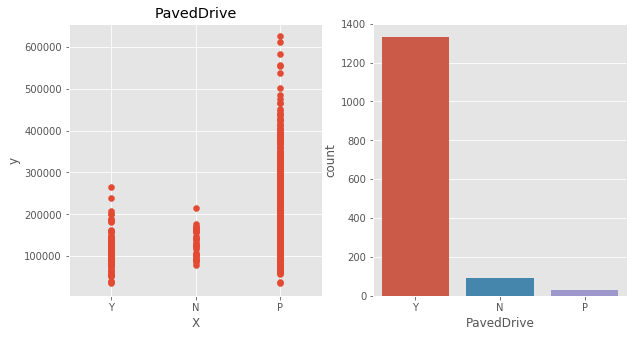

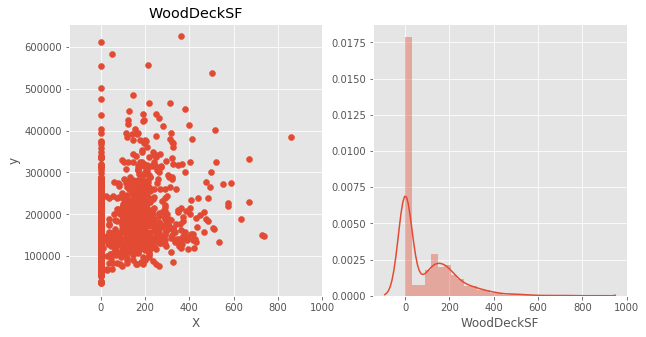

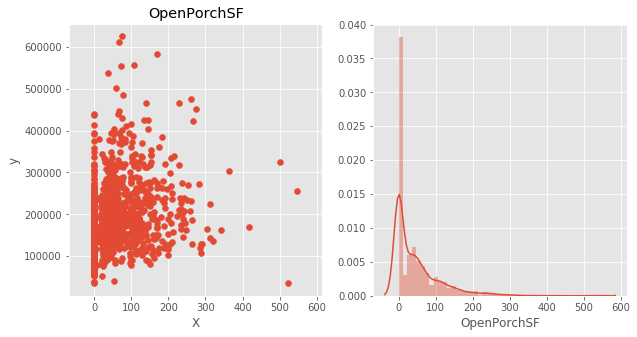

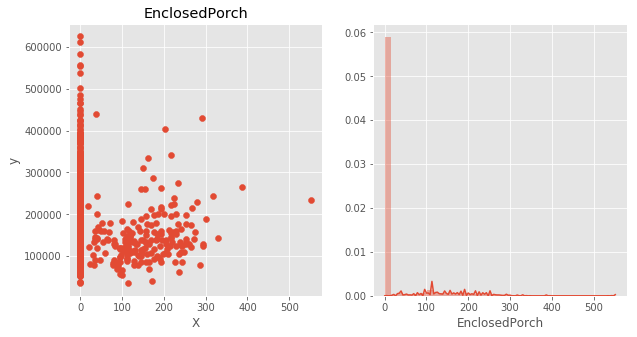

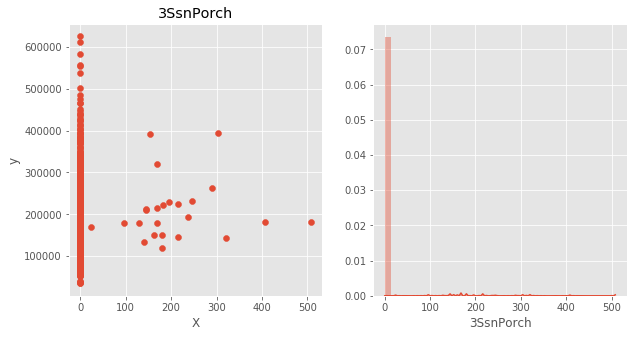

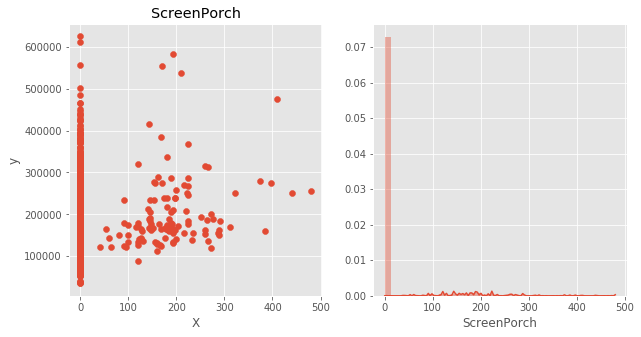

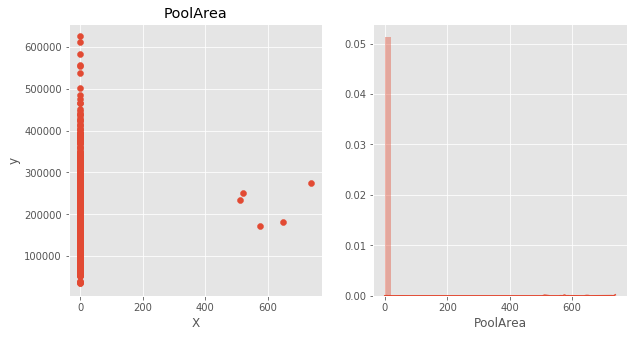

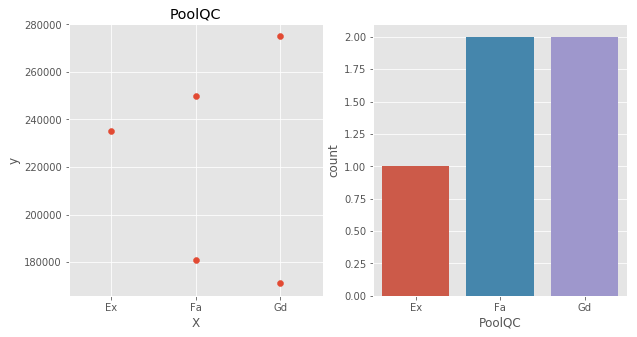

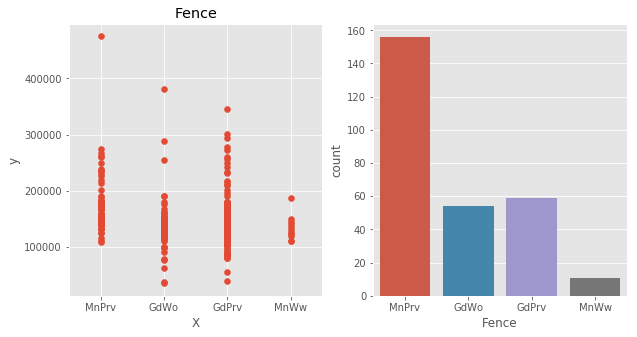

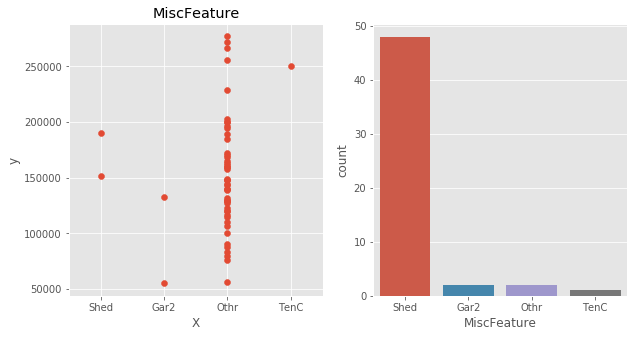

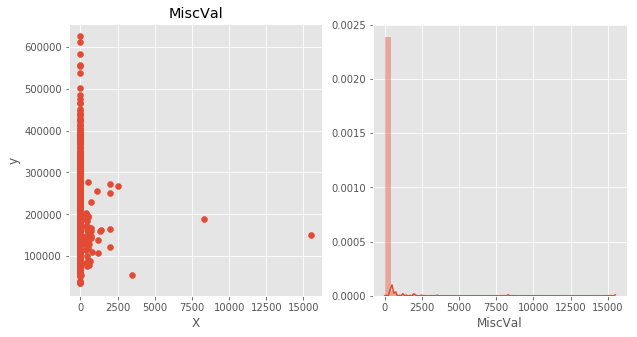

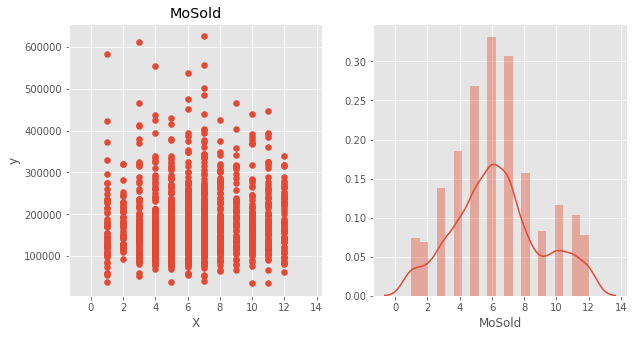

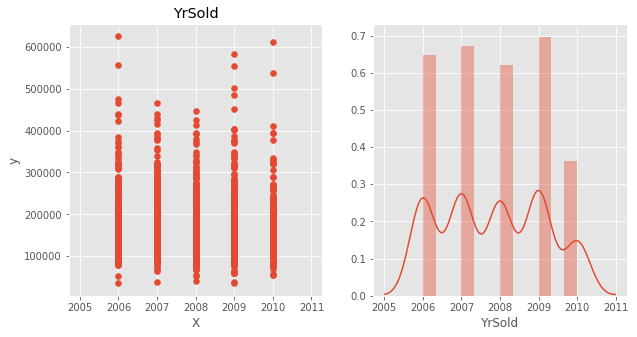

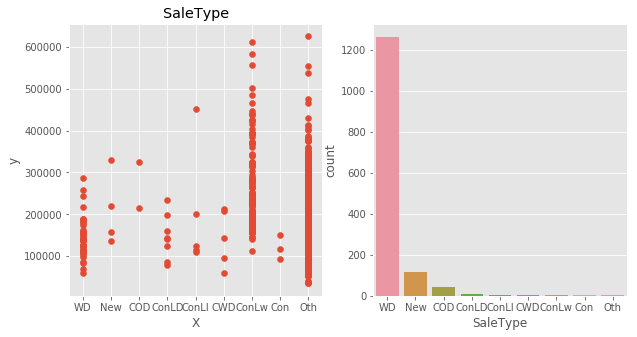

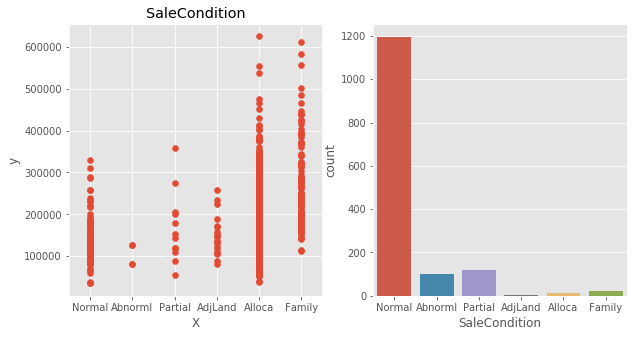

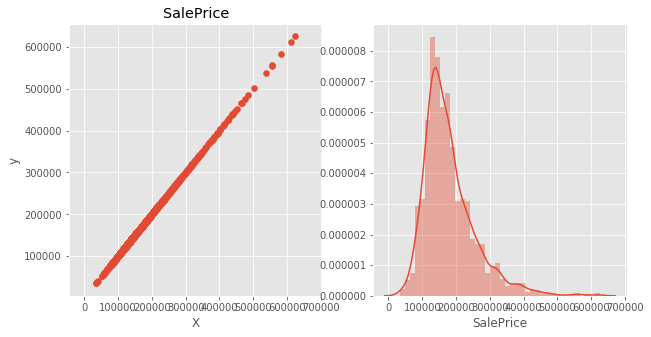

In [77]:
def plot_feature(X):
    y = train.loc[X.index, 'SalePrice']
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(X.name)
    
for feature in train.columns:
    X = train[feature].dropna()
    fig , (ax1, ax2) = plt.subplots(1,2, figsize=(10,5), sharex=True)
    plt.subplot(ax1)
    plot_feature(X)
    plt.subplot(ax2)
    if train[feature].dtype == np.dtype('object'):
        sns.countplot(X)
    else:
        sns.distplot(X)
        
plt.show()

### Exploring Categorical Data 

Dividing numerical features and categorical features and showing how many each categorical feature has categories

In [79]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1452   1452    91     1452        1452      1452      1452   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1144   1447    50      921        1307      1451      1047   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1452         1452       1452      ...            1371   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1375          225       1255      ...             865   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1371       1371       1371       1452      5    280   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Fa  MnPrv   
freq            605       1303       1318       1332      2    156   

       MiscFeature SaleType SaleCondition  
count           53     1452          1452  
unique           4        9             6  
top           Shed       WD        Normal  
freq            48     1264          1195  

[4 rows x 43 columns]

In [82]:
for feature in categoricals:
    print ("Unique values of ",feature," : " , train[feature].nunique())
    

Unique values of  MSZoning  :  5
Unique values of  Street  :  2
Unique values of  Alley  :  2
Unique values of  LotShape  :  4
Unique values of  LandContour  :  4
Unique values of  Utilities  :  2
Unique values of  LotConfig  :  5
Unique values of  LandSlope  :  3
Unique values of  Neighborhood  :  25
Unique values of  Condition1  :  9
Unique values of  Condition2  :  7
Unique values of  BldgType  :  5
Unique values of  HouseStyle  :  8
Unique values of  RoofStyle  :  6
Unique values of  RoofMatl  :  7
Unique values of  Exterior1st  :  15
Unique values of  Exterior2nd  :  16
Unique values of  MasVnrType  :  4
Unique values of  ExterQual  :  4
Unique values of  ExterCond  :  5
Unique values of  Foundation  :  6
Unique values of  BsmtQual  :  4
Unique values of  BsmtCond  :  4
Unique values of  BsmtExposure  :  4
Unique values of  BsmtFinType1  :  6
Unique values of  BsmtFinType2  :  6
Unique values of  Heating  :  6
Unique values of  HeatingQC  :  5
Unique values of  CentralAir  :  2
Un

Showing all categorical features

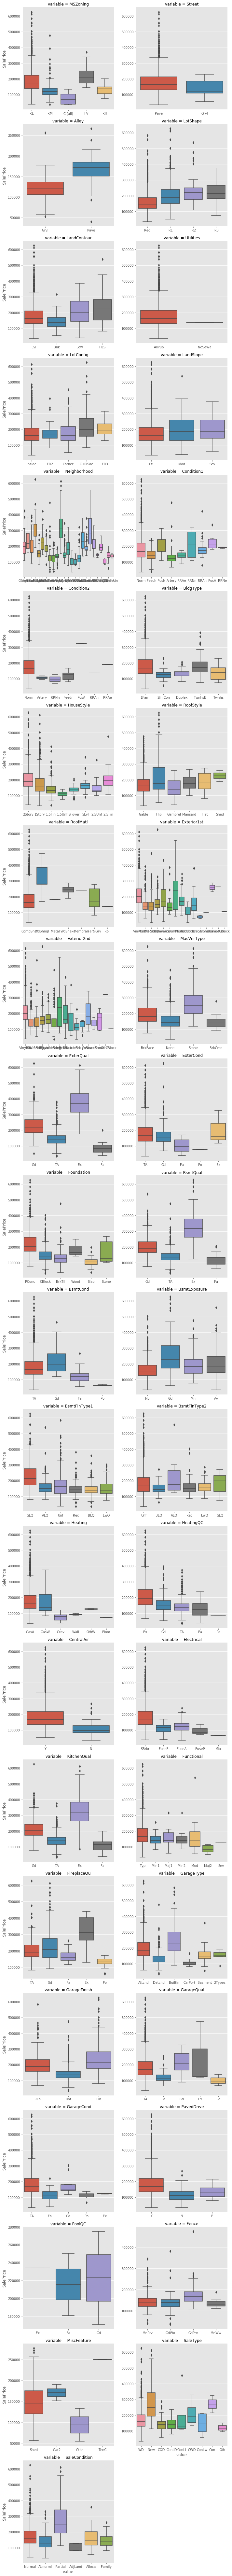

In [84]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=categoricals)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")
plt.show()